# Gaussian Relay Channel Optimization

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context = "paper", font = "monospace", font_scale=2)

# Define input training data and parameter

In [2]:
input_signal_num = 100000 # number of training data
input_data = 5*np.random.randn(input_signal_num, 1) # generate # of gaussian dist input
mean_w = 0.0 # mean of noise
std_w = 1#0.5#1.0 # std of noise
k = 0.1

number_of_units = 512
number_of_iterations = 30000

# Define encoder, relay, and decoder (all in one network)

In [3]:
# input x
x = tf.placeholder(tf.float32, [None, 1])
tmp_c = tf.placeholder(tf.float32, [None, 1])
disp = tf.placeholder(tf.float32, [None, 1])
# first neural network (encoder)
l_11 = tf.layers.dense(inputs = x, units = number_of_units, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))
        
l_12 = tf.layers.dense(inputs = l_11, units = number_of_units/2, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l_13 = tf.layers.dense(inputs = l_12, units = number_of_units/4, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l_14 = tf.layers.dense(inputs = l_13, units = number_of_units/8, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

# output of first neural network
u1 = tf.layers.dense(inputs = l_14, units = 1,  
                             kernel_initializer = tf.random_normal_initializer(0.,.1), 
                             bias_initializer = tf.constant_initializer(0.1))

# gaussian noise
w1 = tf.random_normal([input_signal_num, 1], mean=mean_w, stddev=std_w, dtype=tf.float32, seed=None)

# add u1 with gaussian noise
y2 = tf.add(tf.multiply(tf.add(u1, w1),tmp_c), disp)

# second neural network (decoder)
l_21 = tf.layers.dense(inputs = y2, units = number_of_units, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))
        
l_22 = tf.layers.dense(inputs = l_21, units = number_of_units/2, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l_23 = tf.layers.dense(inputs = l_22, units = number_of_units/4, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l_24 = tf.layers.dense(inputs = l_23, units = number_of_units/8, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

# output of second neural network
u2 = tf.layers.dense(inputs = l_24, units = 1,  
                             kernel_initializer = tf.random_normal_initializer(0.,.1), 
                             bias_initializer = tf.constant_initializer(0.1))

# gaussian noise
w2 = tf.random_normal([input_signal_num, 1], mean=mean_w, stddev=std_w, dtype=tf.float32, seed=None)

# add u1 with gaussian noise
y3 = tf.add(tf.multiply(tf.add(u2, w2),tmp_c), disp)

# second neural network (decoder)
l_31 = tf.layers.dense(inputs = y3, units = number_of_units, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))
        
l_32 = tf.layers.dense(inputs = l_31, units = number_of_units/2, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l_33 = tf.layers.dense(inputs = l_32, units = number_of_units/4, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l_34 = tf.layers.dense(inputs = l_33, units = number_of_units/8, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

# output of second neural network
u3 = tf.layers.dense(inputs = l_34, units = 1,  
                             kernel_initializer = tf.random_normal_initializer(0.,.1), 
                             bias_initializer = tf.constant_initializer(0.1))



[network2.png](attachment:network2.png)

# Define loss function

In [4]:
loss = k * tf.reduce_mean(tf.square(u1)) + k * tf.reduce_mean(tf.square(u2)) + tf.reduce_mean(tf.square(u3-x)) 
# k(u1-x)^2+(u2-u1)^2
optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [6]:
x_axis = np.array([np.linspace(-15, 15, num=input_signal_num).tolist()]).T

# Before optimization with loss function

In [7]:
y_axis = sess.run(u1, feed_dict = {x:x_axis})

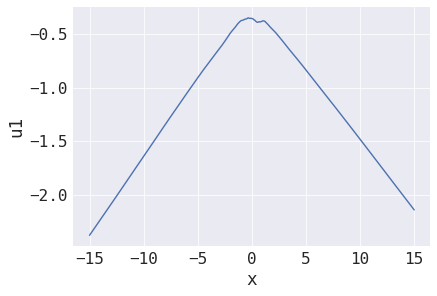

current loss: 437.581 



In [ ]:
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('x')
plt.ylabel('u1')
plt.show()

input_data = 5*np.random.randn(input_signal_num, 1) # generate # of gaussian dist input
feed_dict2 =  {x:input_data, tmp_c : np.array([[1]]), disp : np.array([[0]])}
sess.run(optimizer, feed_dict2)
print('current loss:',sess.run(loss,feed_dict2),'\n')

# Optimization

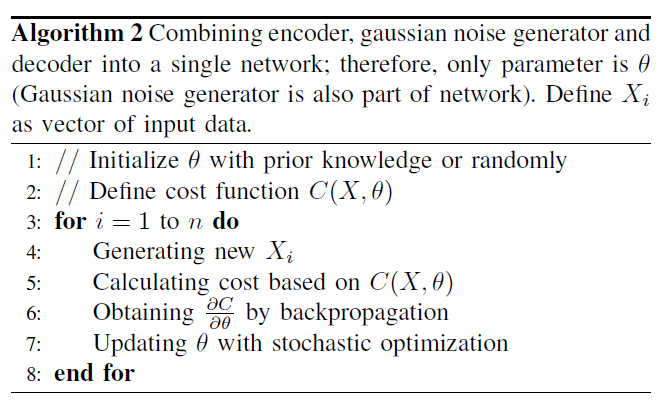

iterations 0  current loss: 27.6101 



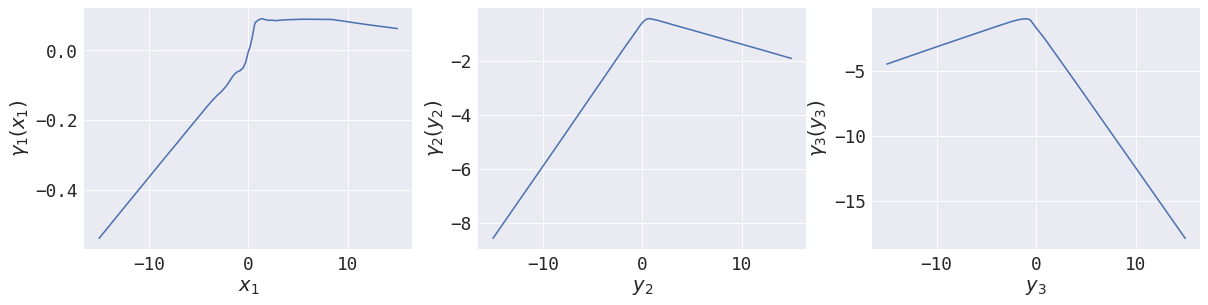

iterations 10  current loss: 13.4386 



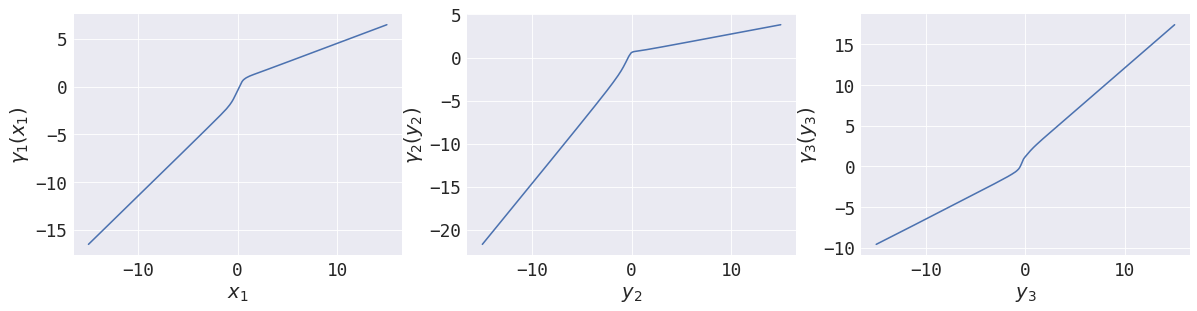

iterations 20  current loss: 8.60188 



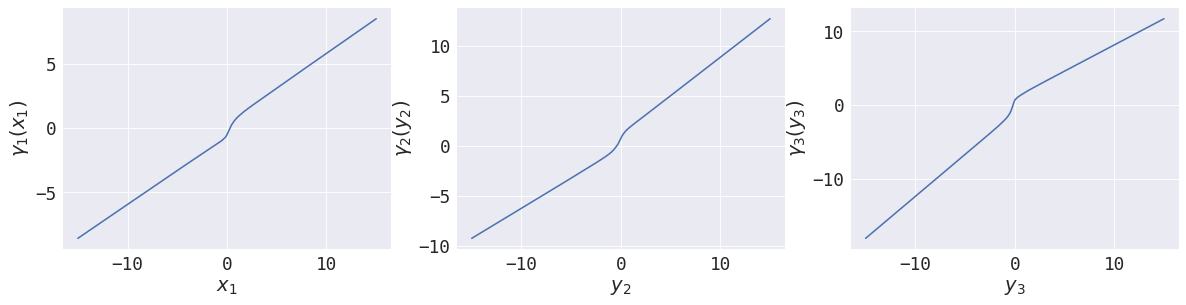

iterations 30  current loss: 7.21902 



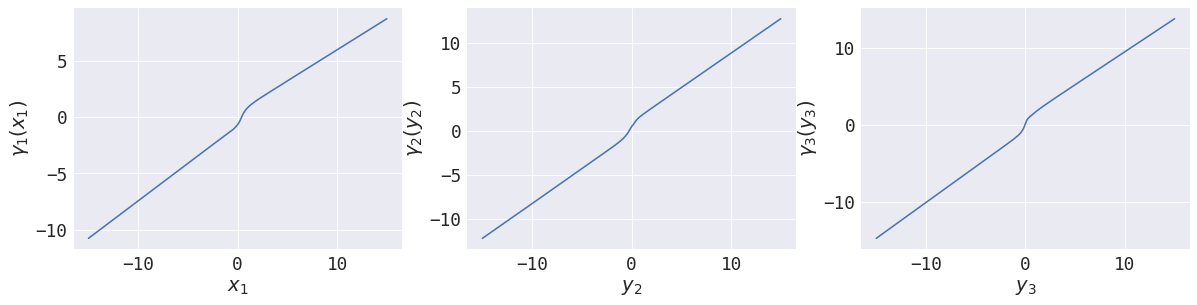

iterations 40  current loss: 6.61415 



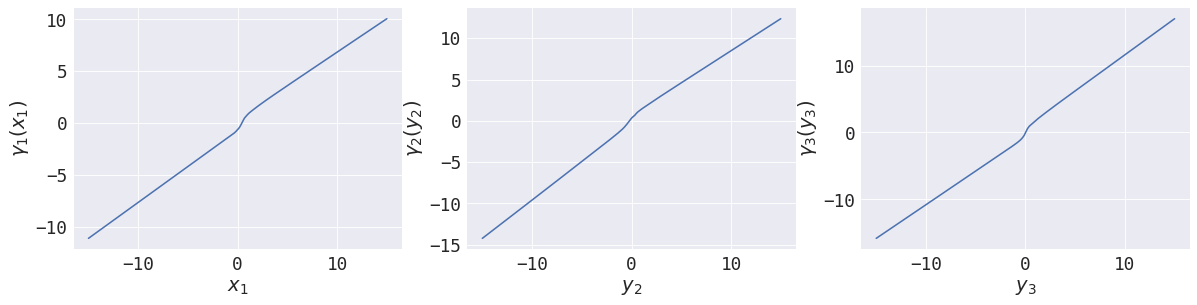

iterations 50  current loss: 6.26112 



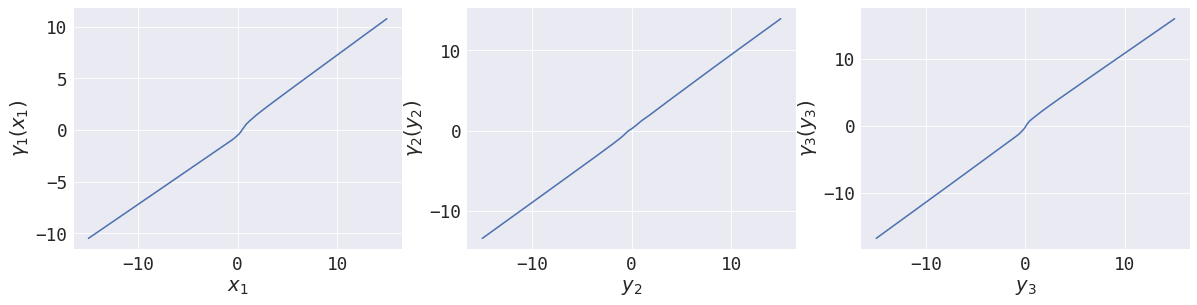

iterations 60  current loss: 6.08146 



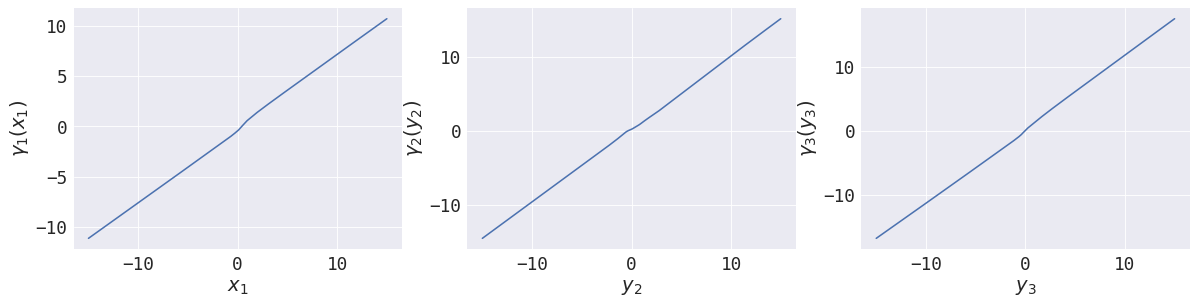

iterations 70  current loss: 6.06245 



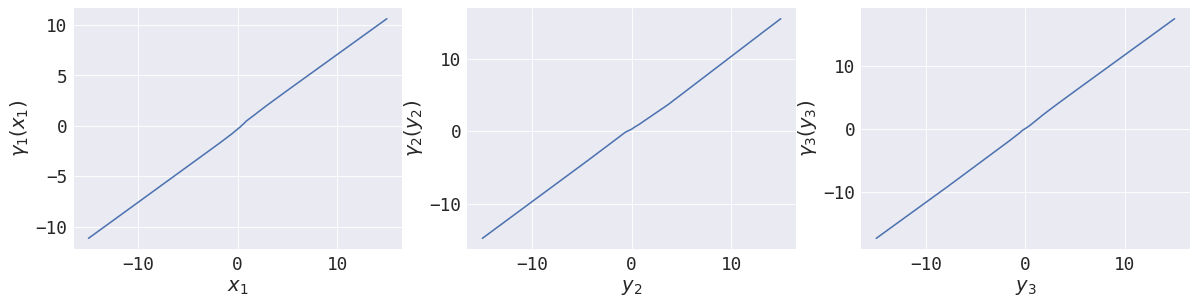

iterations 80  current loss: 6.02491 



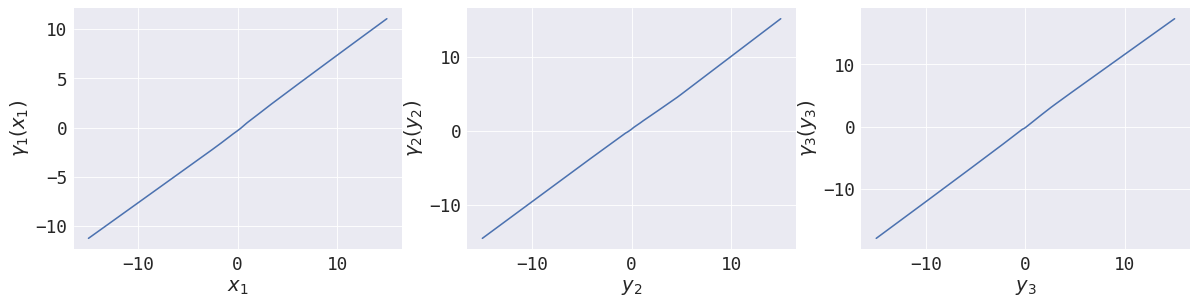

iterations 90  current loss: 6.02017 



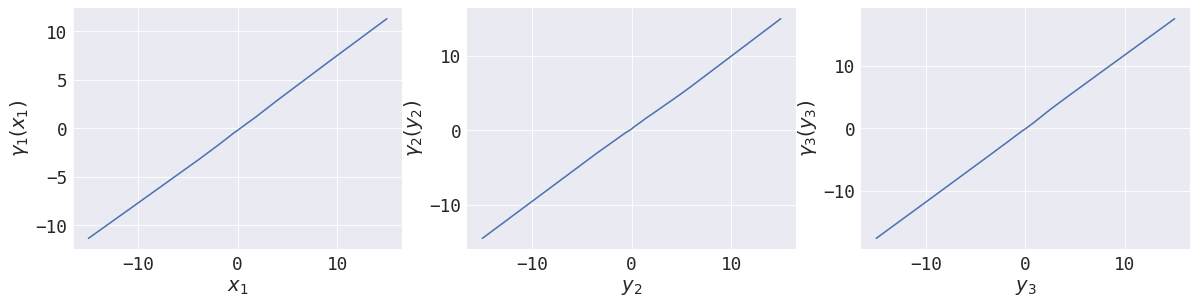

iterations 100  current loss: 6.03003 



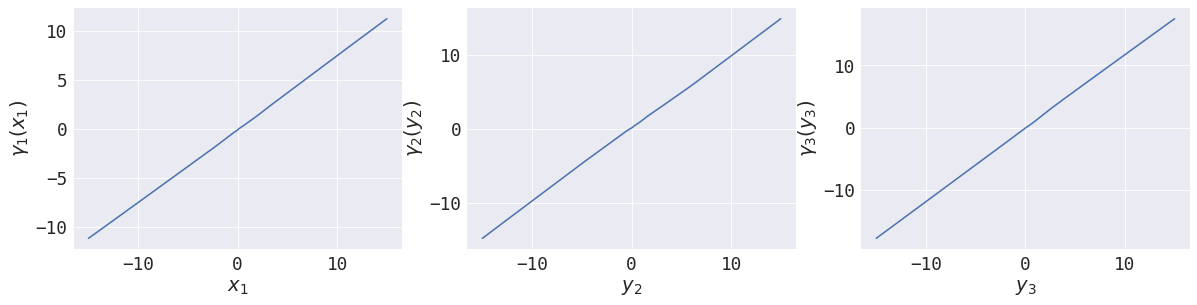

iterations 110  current loss: 6.01765 



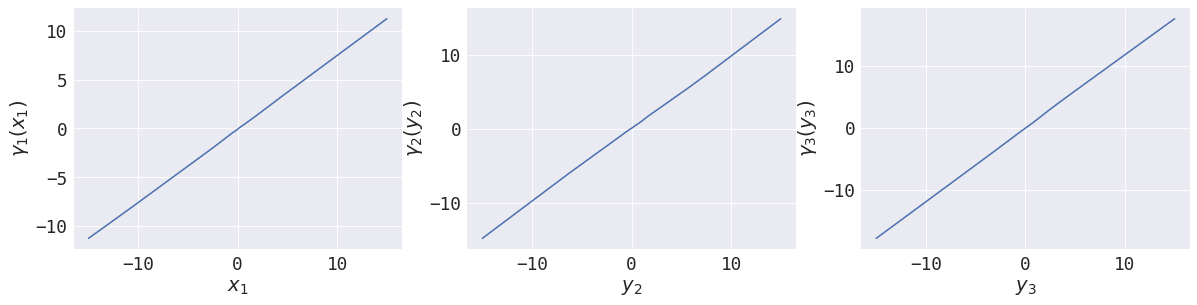

iterations 120  current loss: 6.01075 



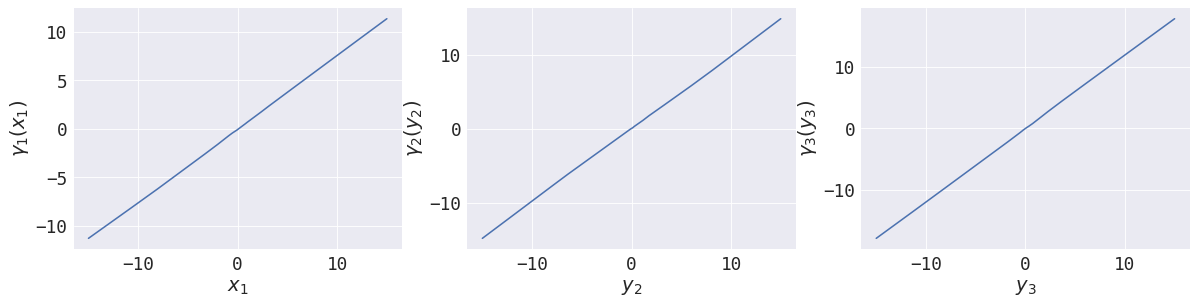

iterations 130  current loss: 6.01569 



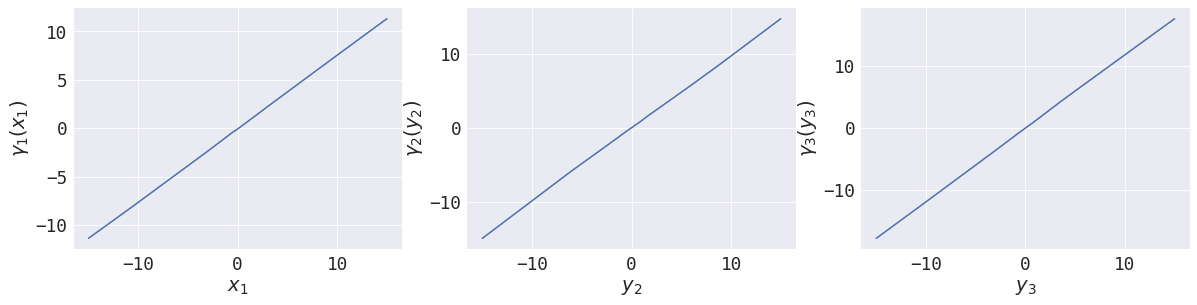

iterations 140  current loss: 6.03576 



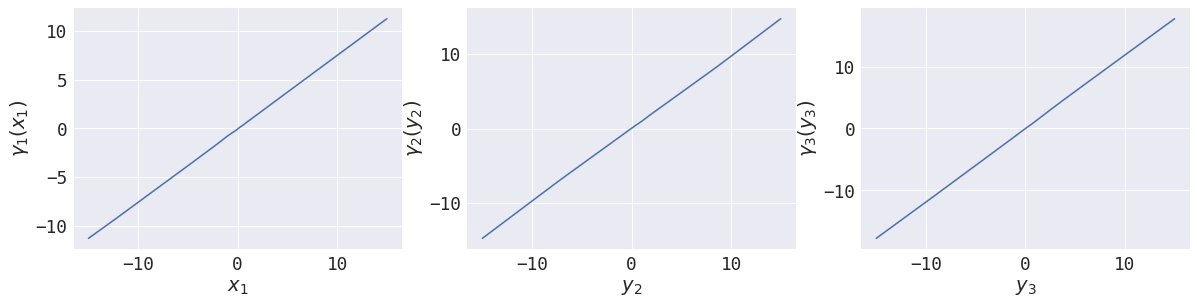

iterations 150  current loss: 6.01126 



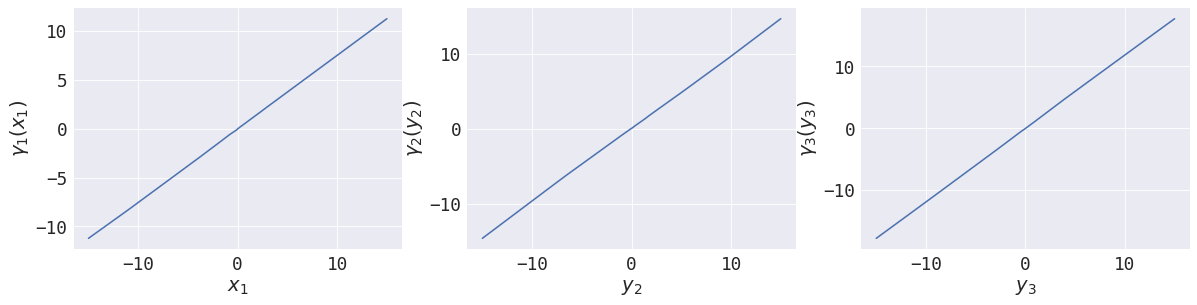

iterations 160  current loss: 6.03848 



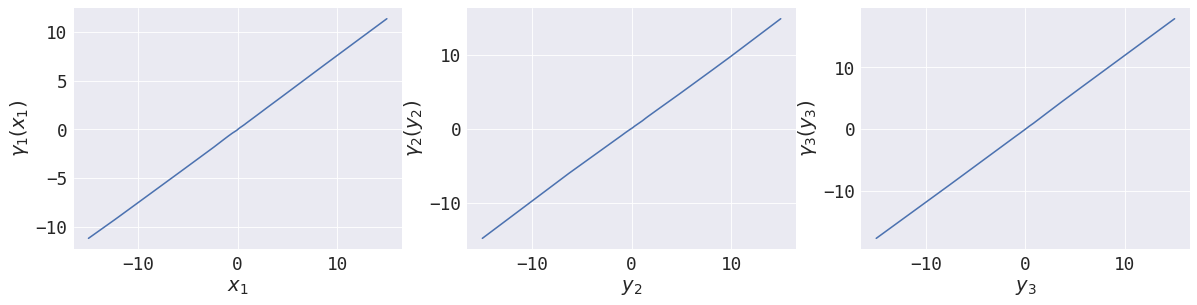

iterations 170  current loss: 6.01061 



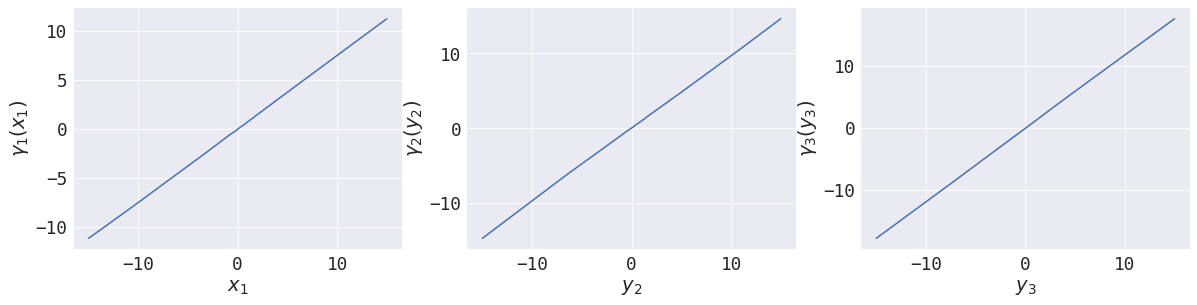

iterations 180  current loss: 6.02142 



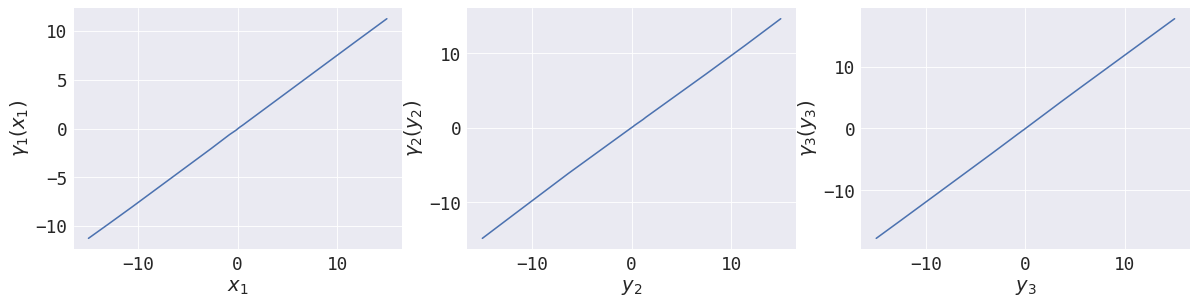

iterations 190  current loss: 6.04712 



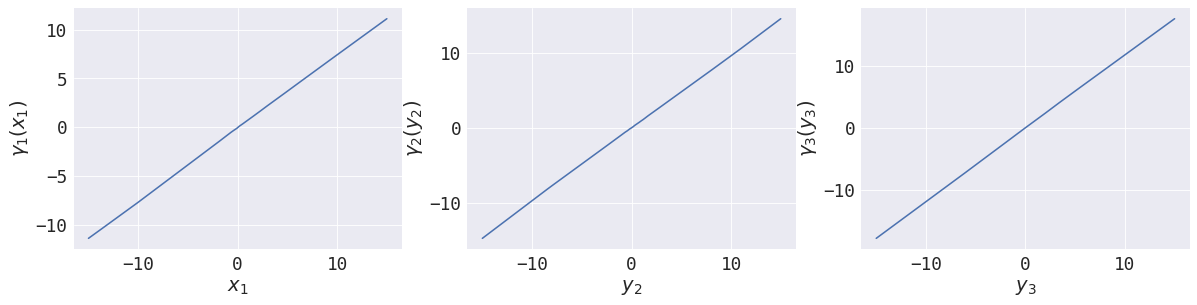

iterations 200  current loss: 6.02958 



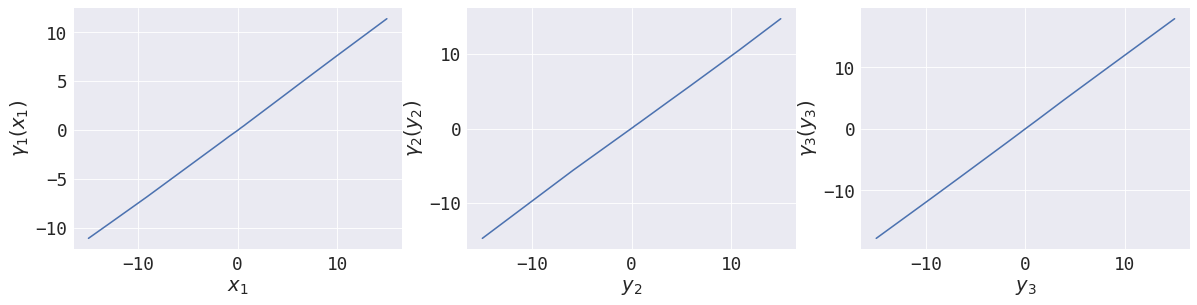

iterations 210  current loss: 6.01864 



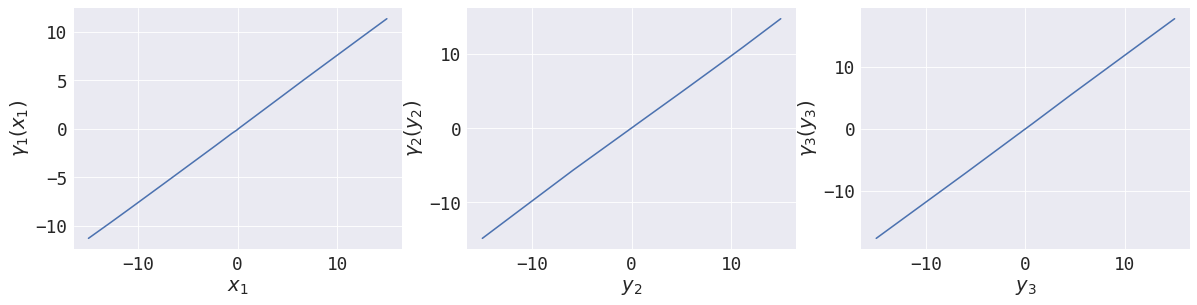

iterations 220  current loss: 6.04839 



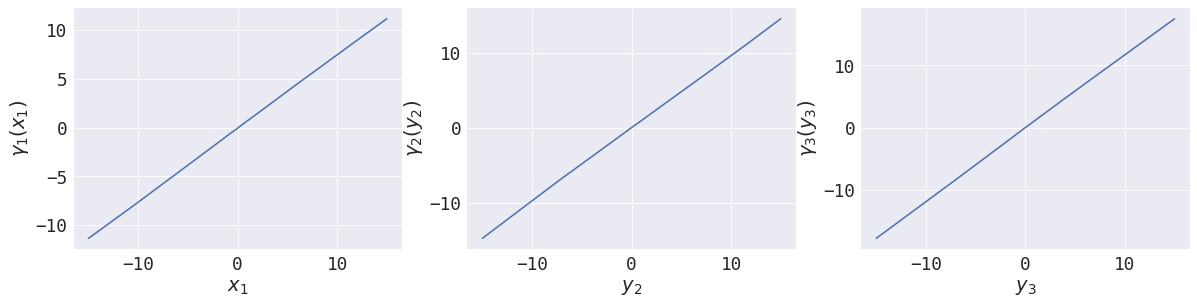

iterations 230  current loss: 6.04261 



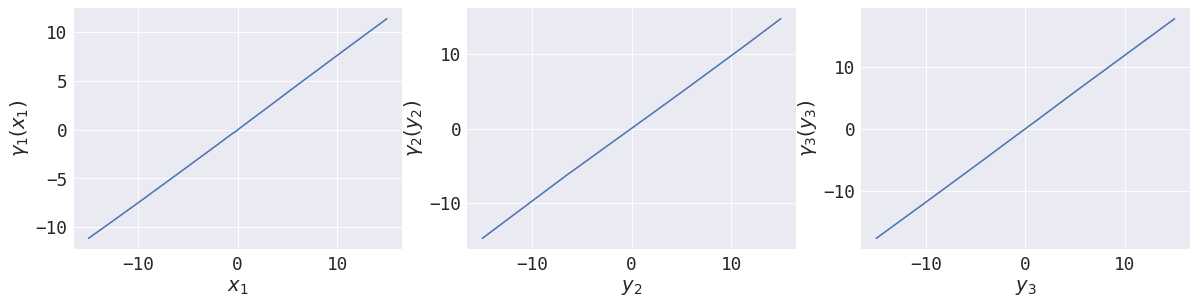

iterations 240  current loss: 6.03044 



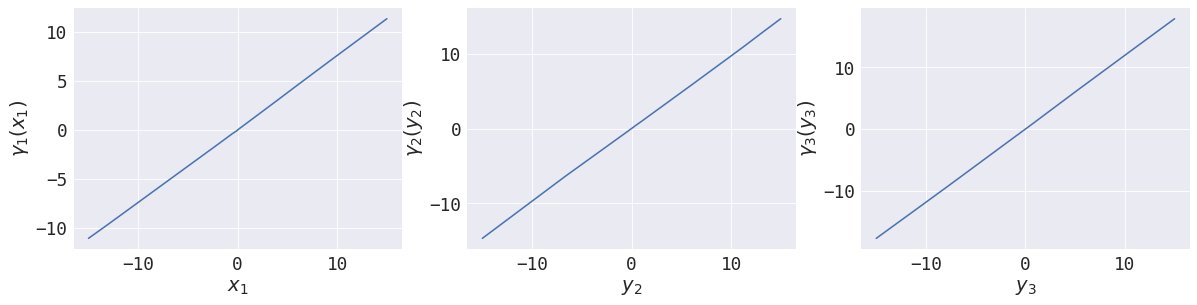

iterations 250  current loss: 6.03662 



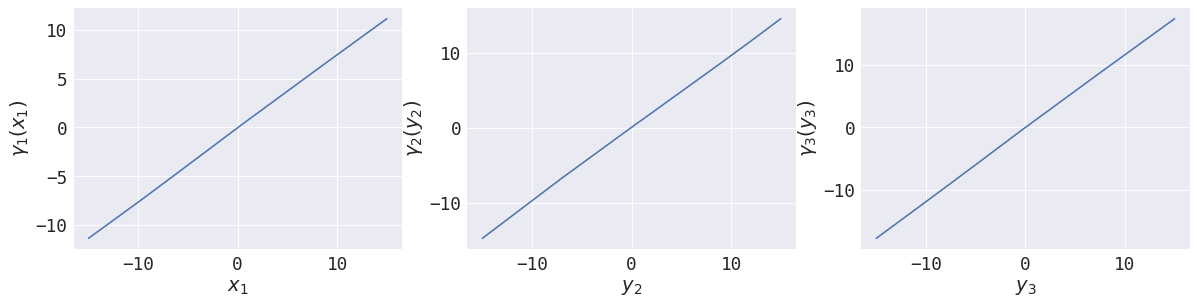

iterations 260  current loss: 6.01952 



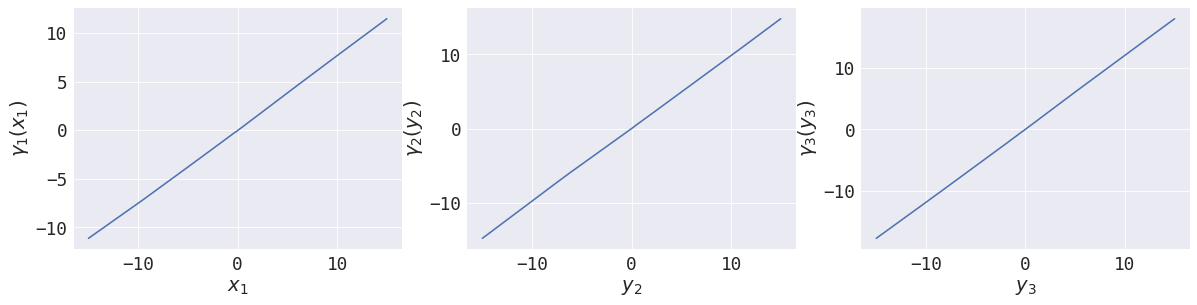

iterations 270  current loss: 6.02442 



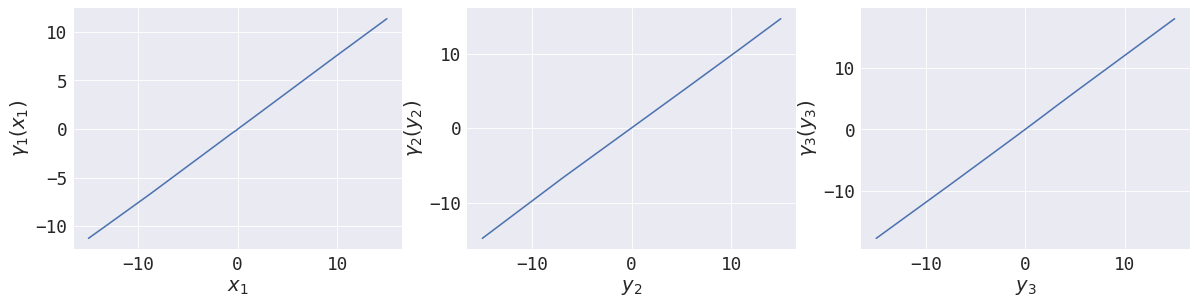

iterations 280  current loss: 6.0164 



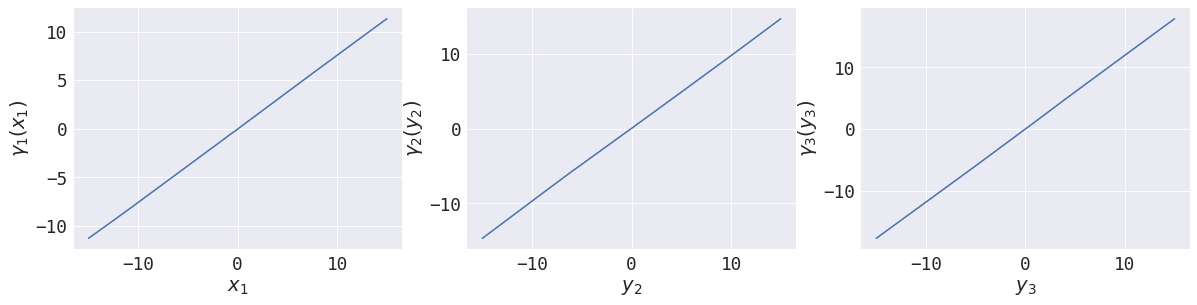

iterations 290  current loss: 6.03452 



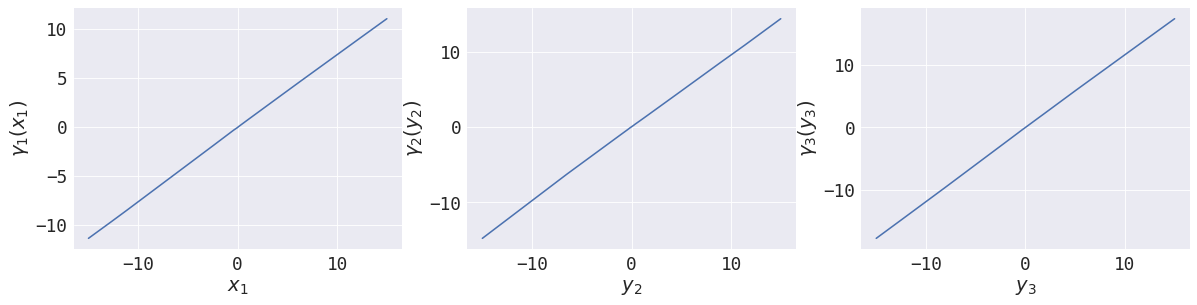

iterations 300  current loss: 6.04028 



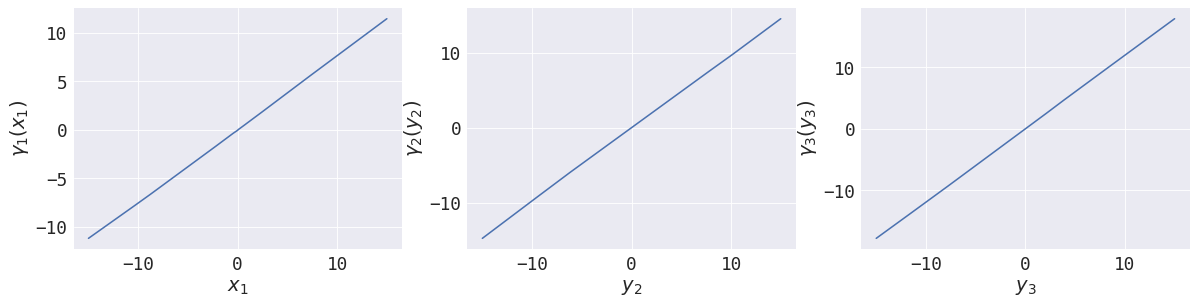

iterations 310  current loss: 6.056 



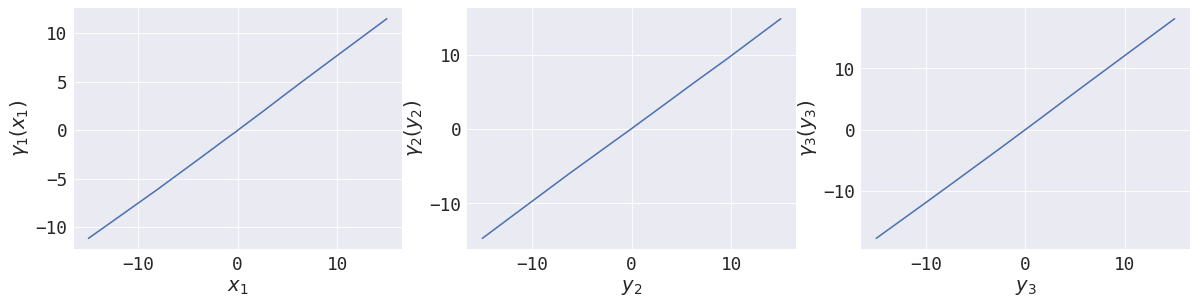

iterations 320  current loss: 6.0429 



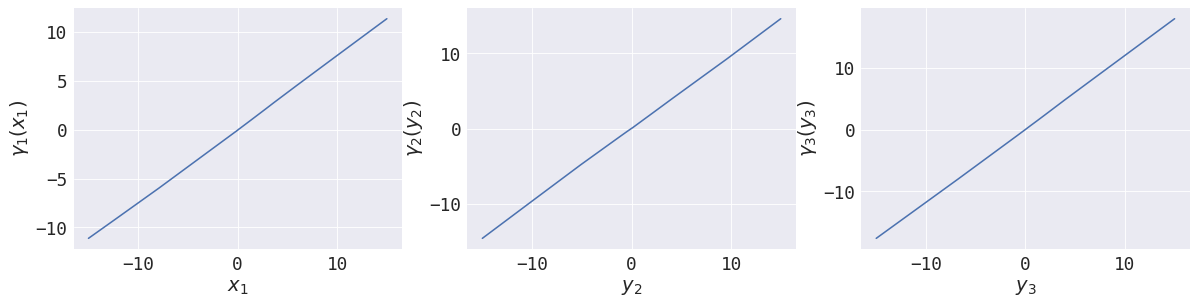

iterations 330  current loss: 6.02048 



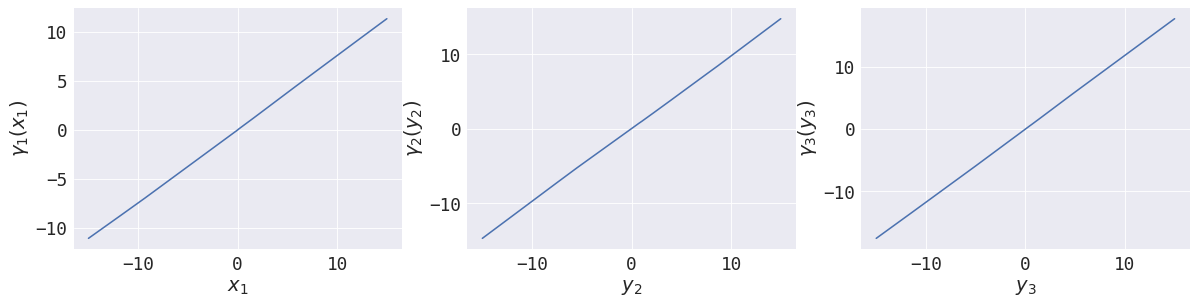

iterations 340  current loss: 6.01612 



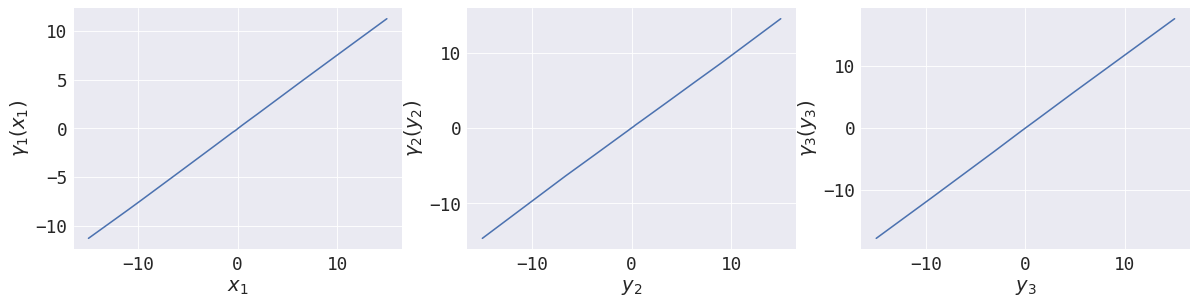

iterations 350  current loss: 6.03037 



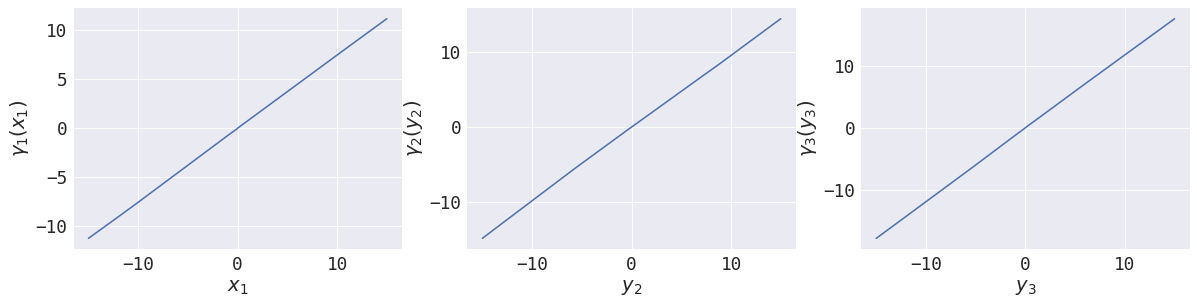

iterations 360  current loss: 6.02775 



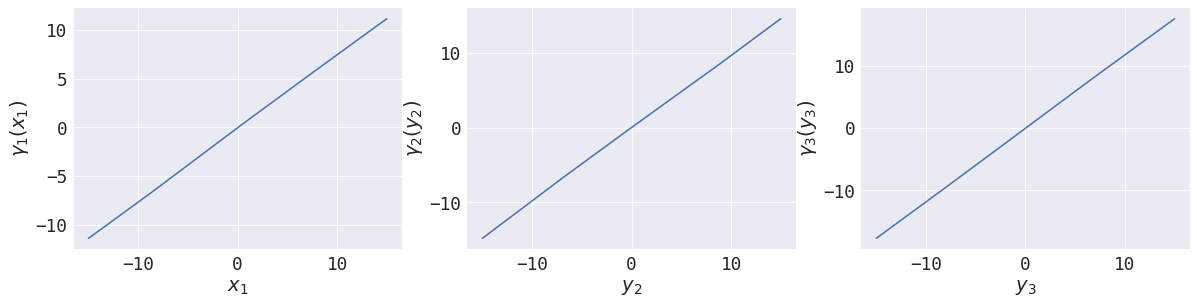

iterations 370  current loss: 6.02798 



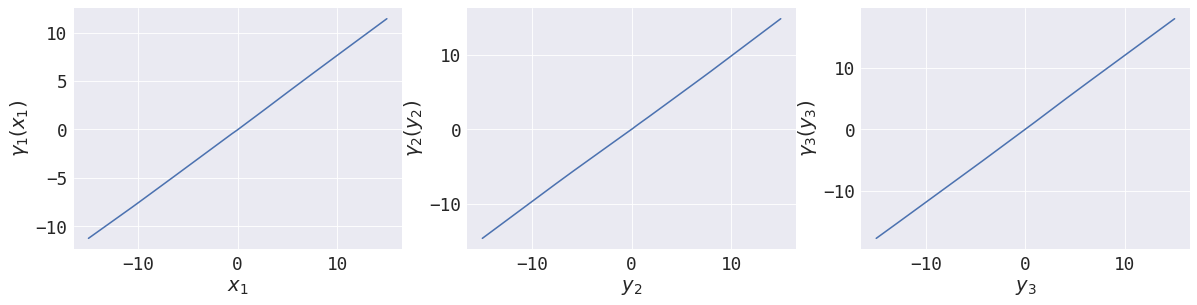

iterations 380  current loss: 6.00834 



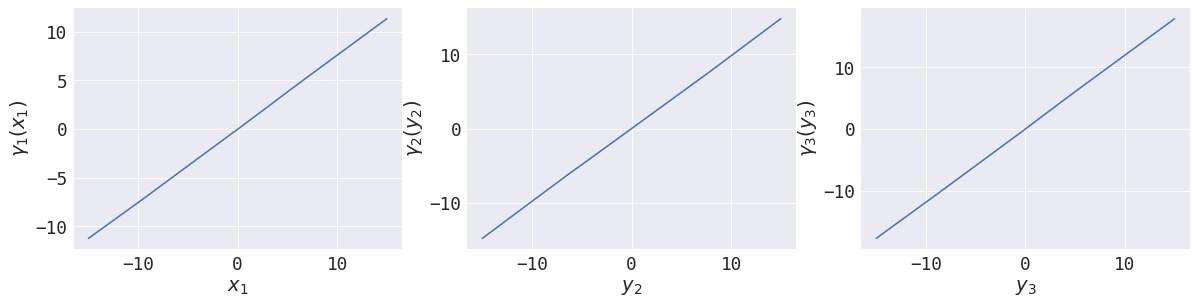

iterations 390  current loss: 6.02429 



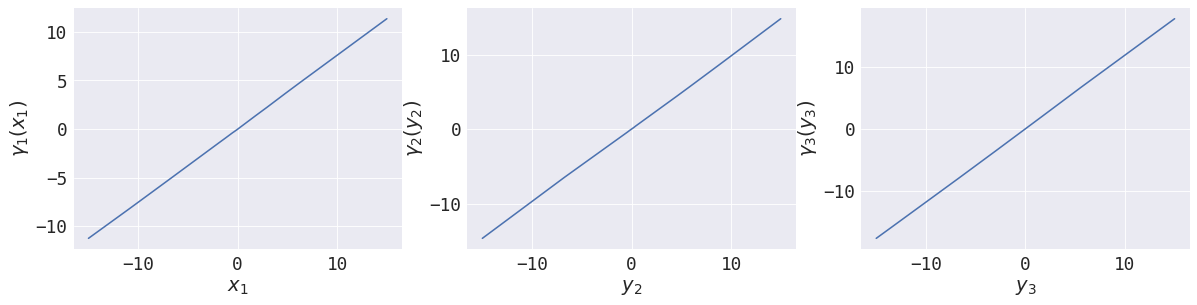

iterations 400  current loss: 6.00208 



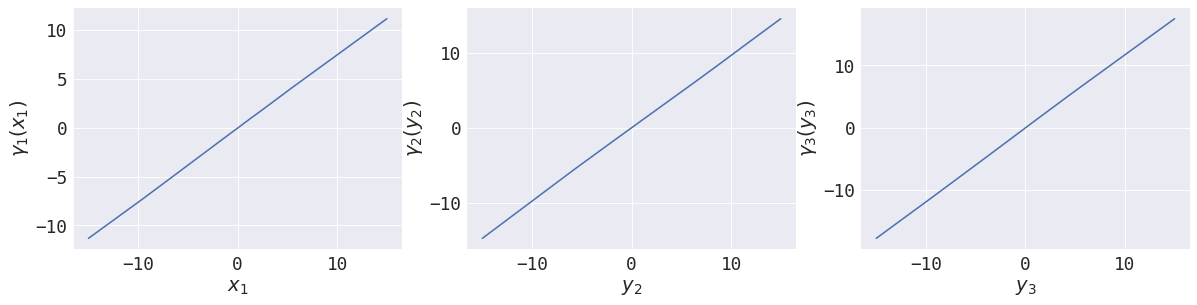

iterations 410  current loss: 5.97283 



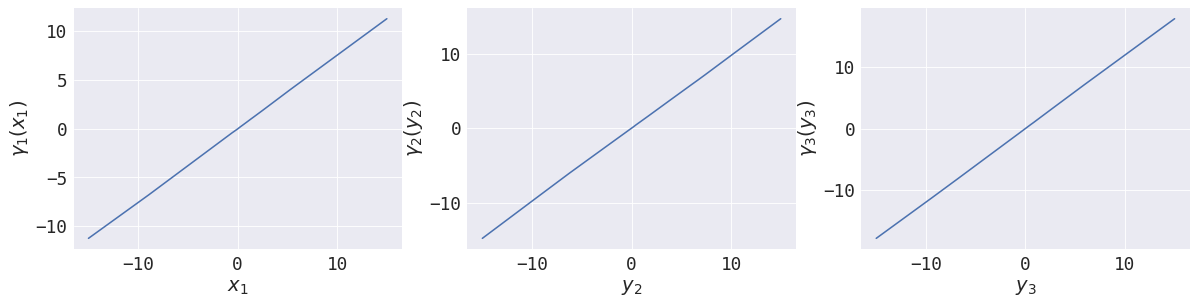

iterations 420  current loss: 6.02689 



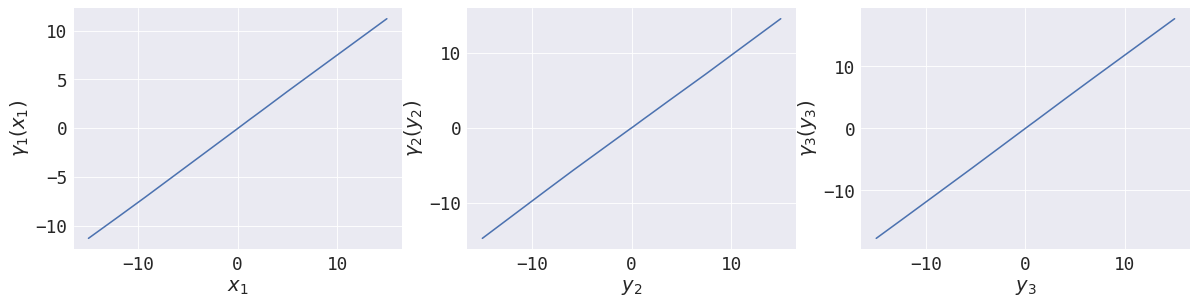

iterations 430  current loss: 6.05163 



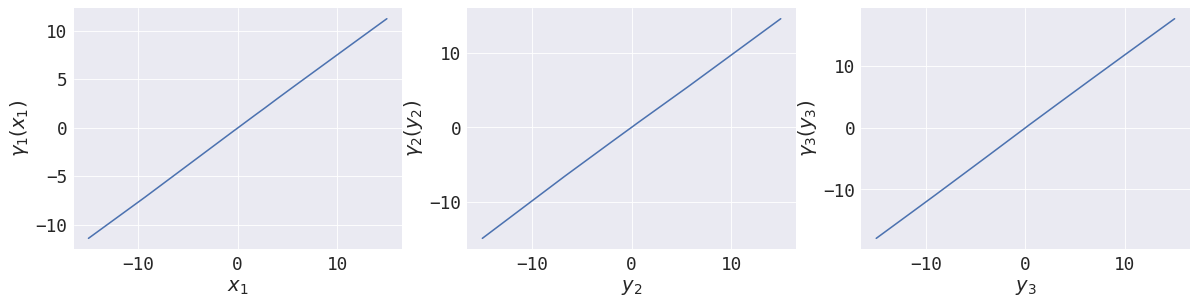

iterations 440  current loss: 6.04599 



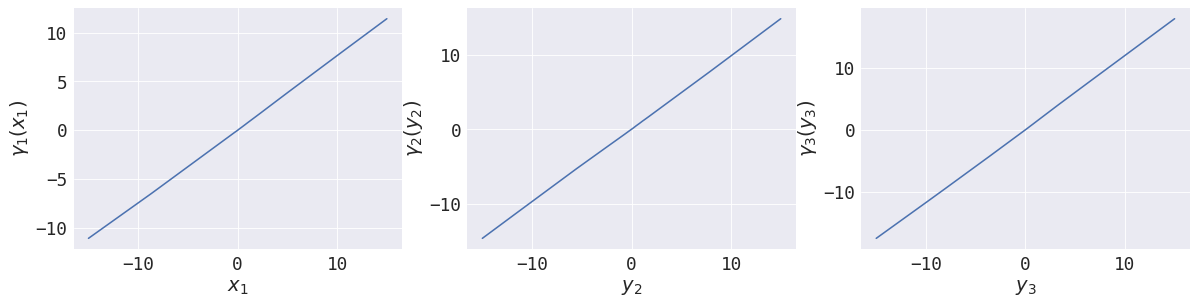

iterations 450  current loss: 6.02865 



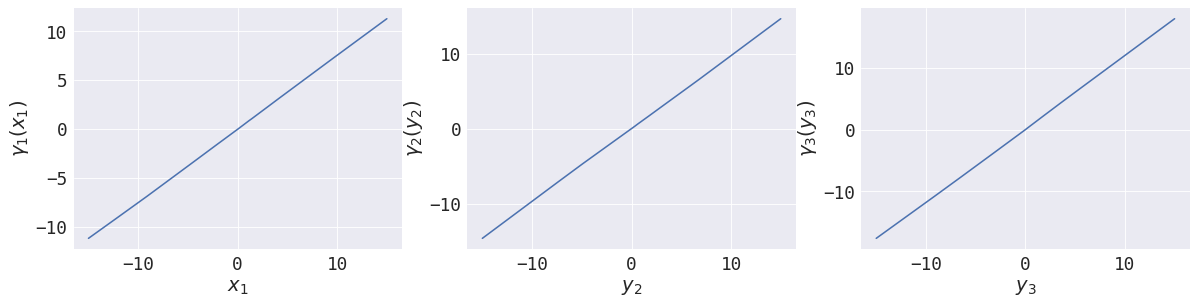

iterations 460  current loss: 6.03393 



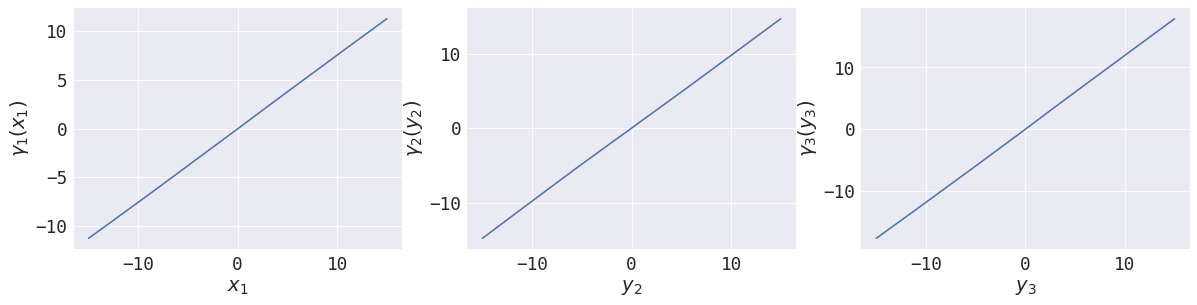

iterations 470  current loss: 6.04504 



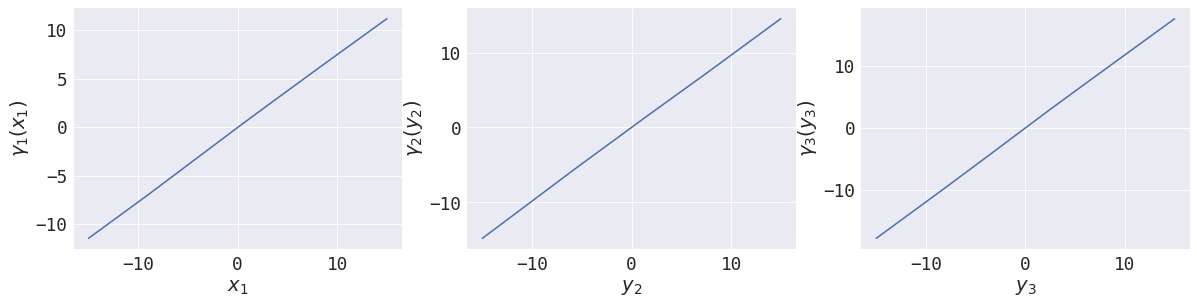

iterations 480  current loss: 6.04006 



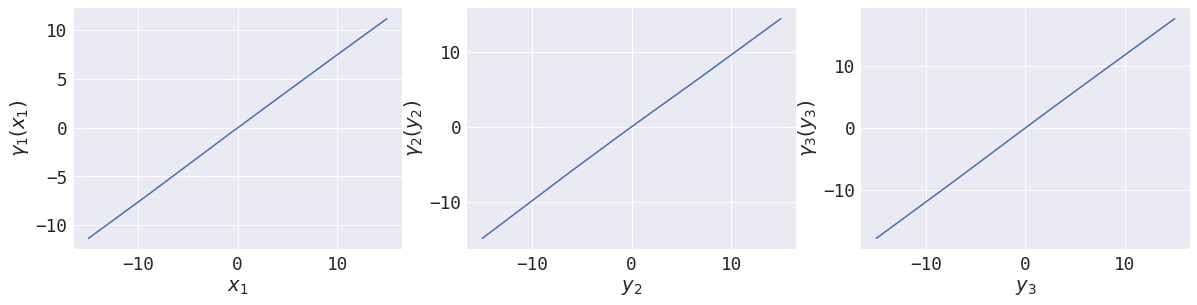

iterations 490  current loss: 6.01778 



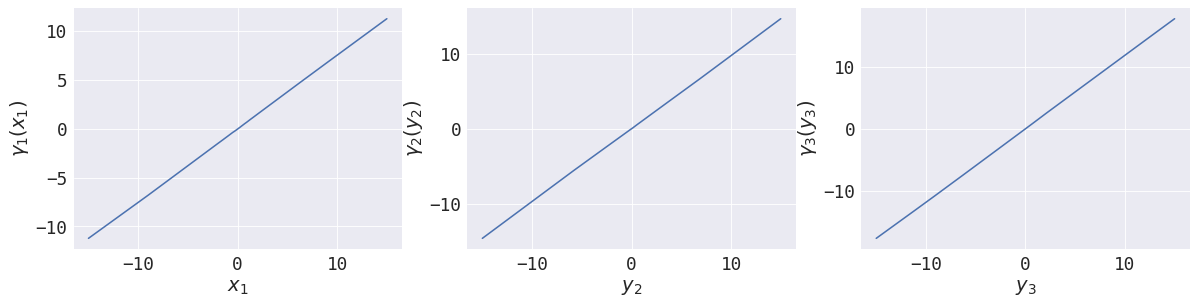

iterations 500  current loss: 6.01013 



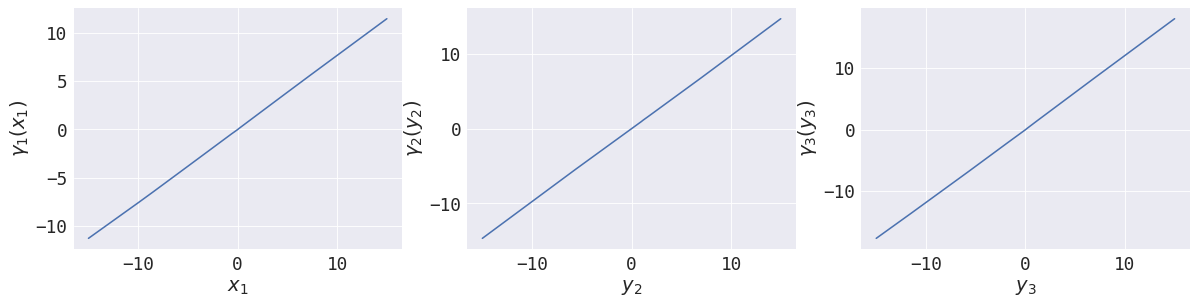

iterations 510  current loss: 6.04557 



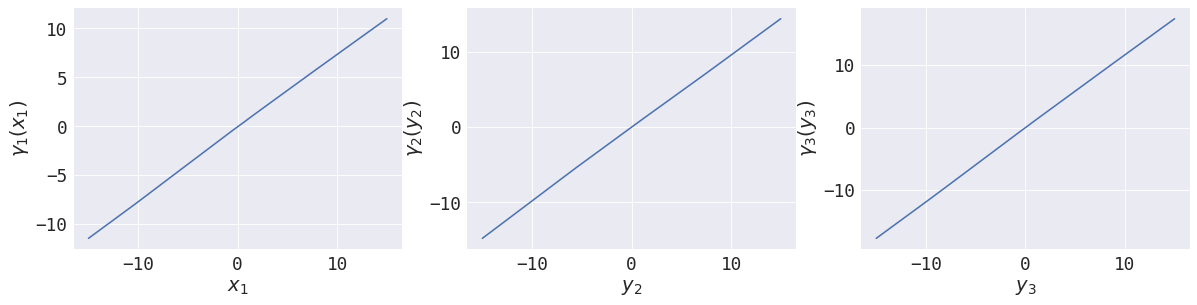

iterations 520  current loss: 6.00472 



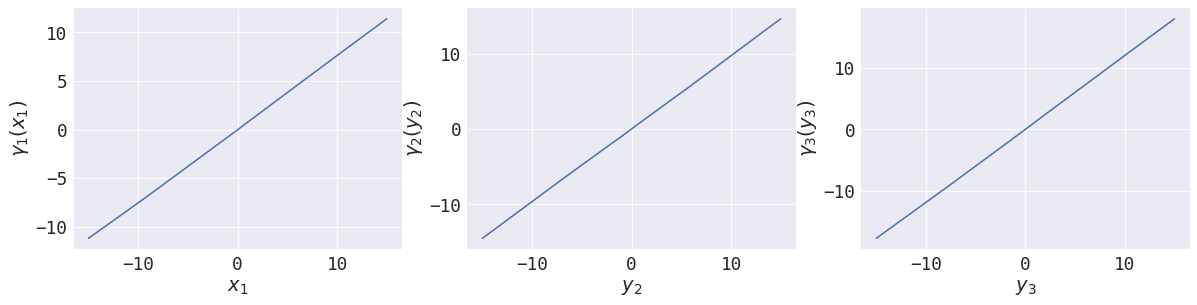

iterations 530  current loss: 6.06827 



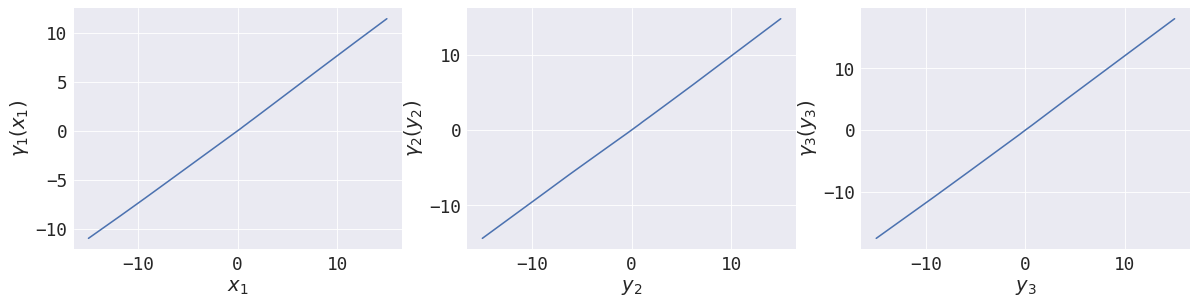

iterations 540  current loss: 6.01887 



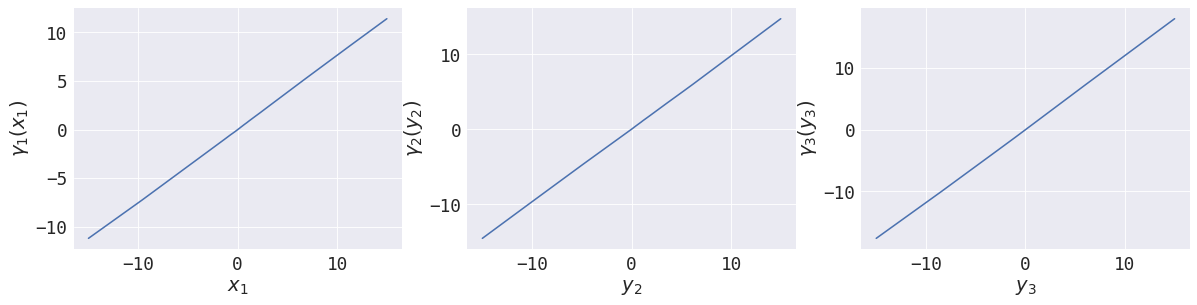

iterations 550  current loss: 6.02365 



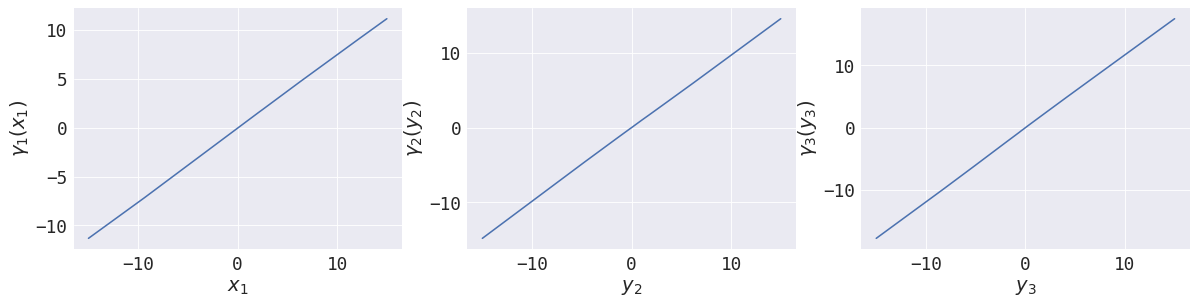

iterations 560  current loss: 5.99164 



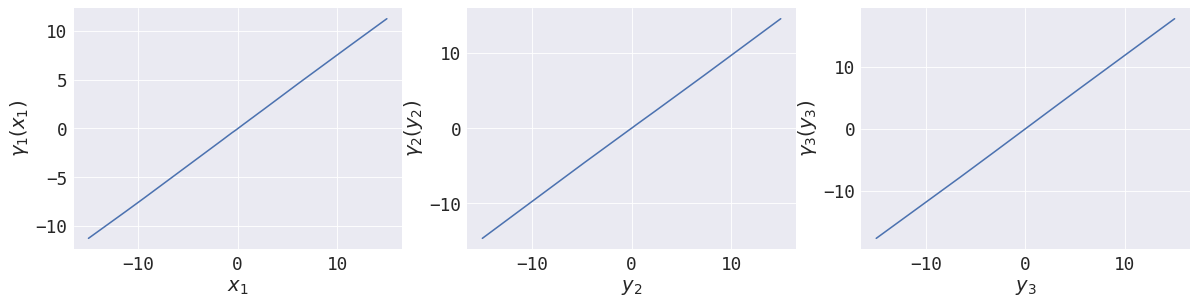

iterations 570  current loss: 6.00821 



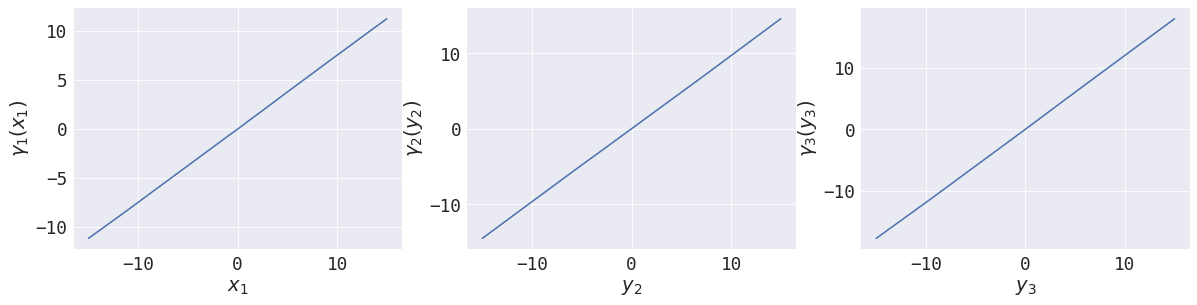

iterations 580  current loss: 5.99686 



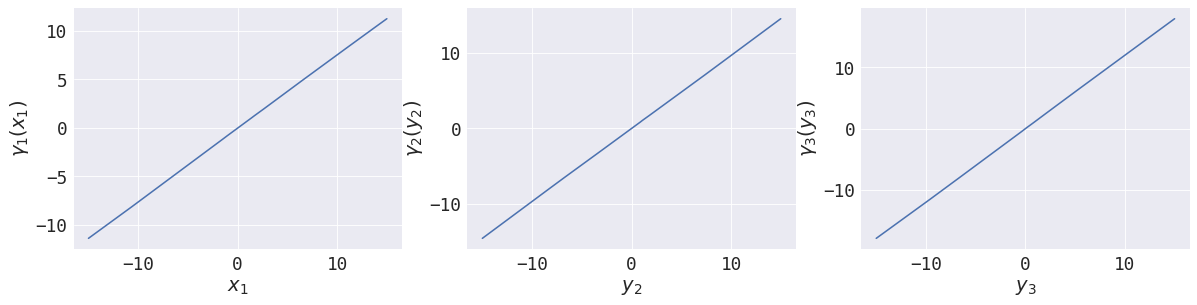

iterations 590  current loss: 6.0295 



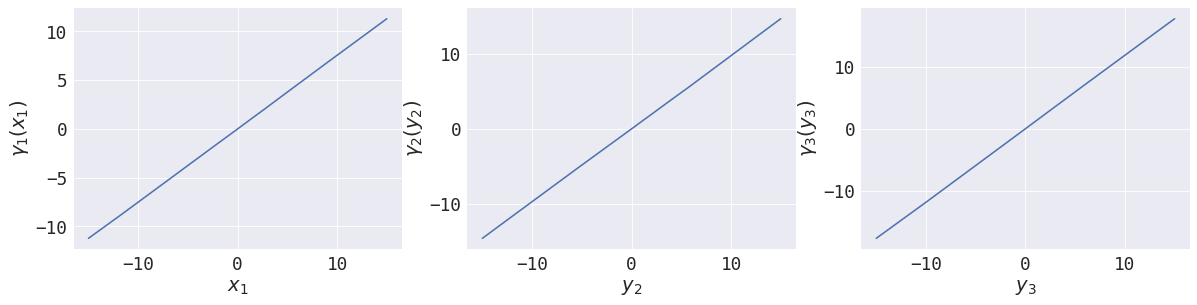

iterations 600  current loss: 6.02145 



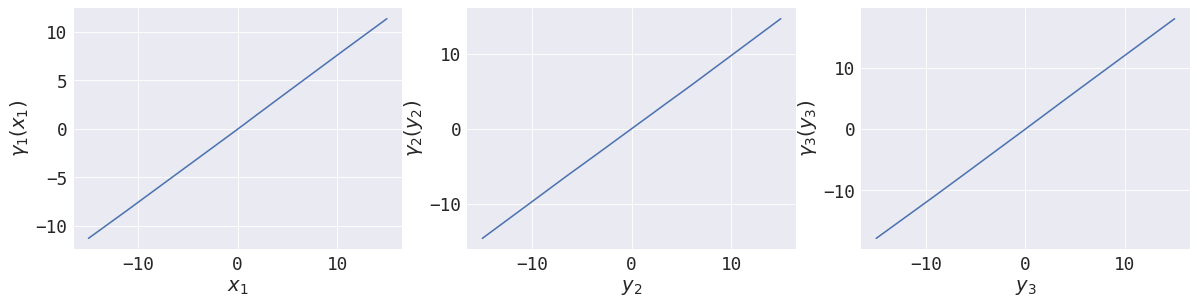

iterations 610  current loss: 6.02481 



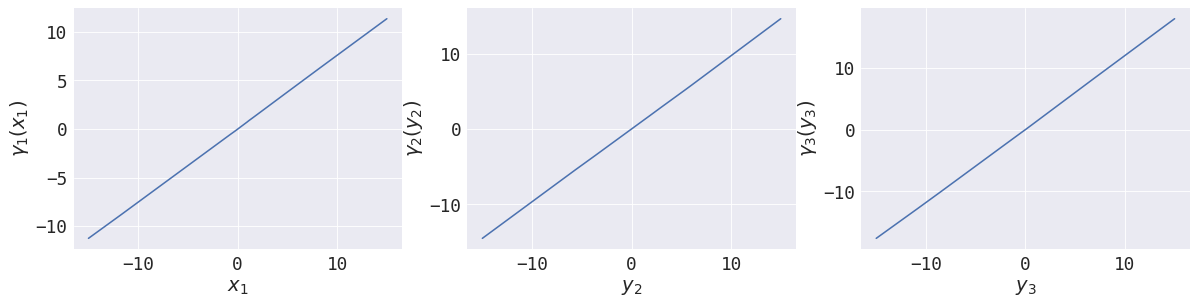

iterations 620  current loss: 6.04098 



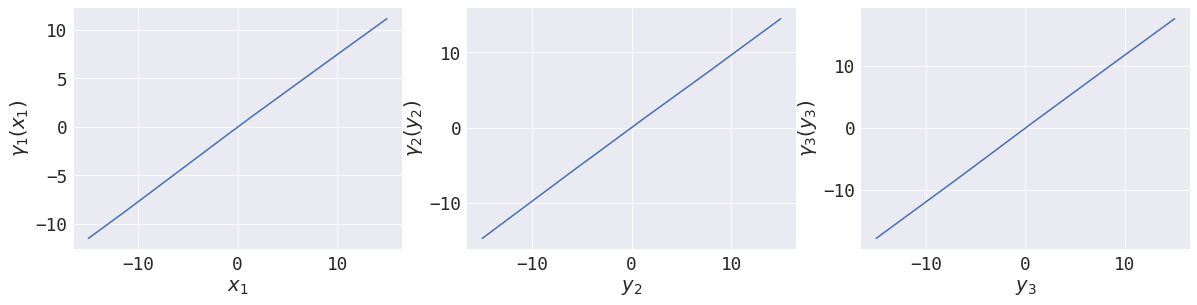

iterations 630  current loss: 6.0496 



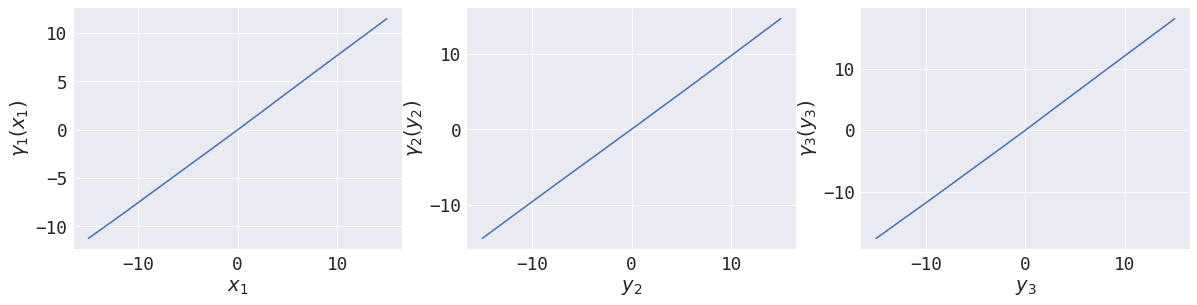

iterations 640  current loss: 6.02321 



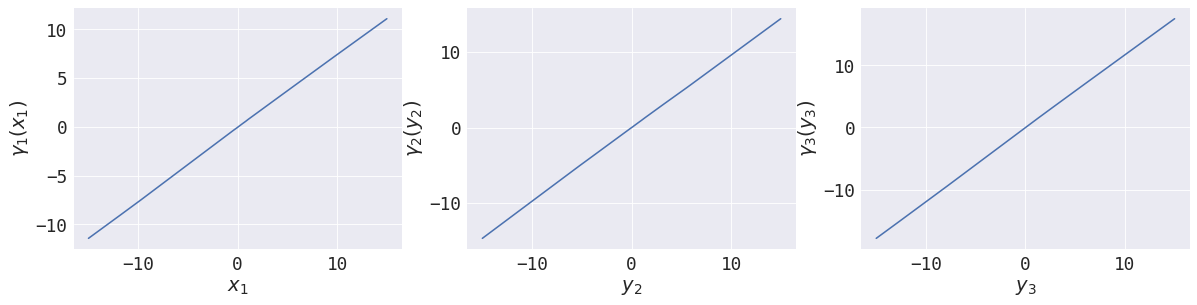

iterations 650  current loss: 6.0032 



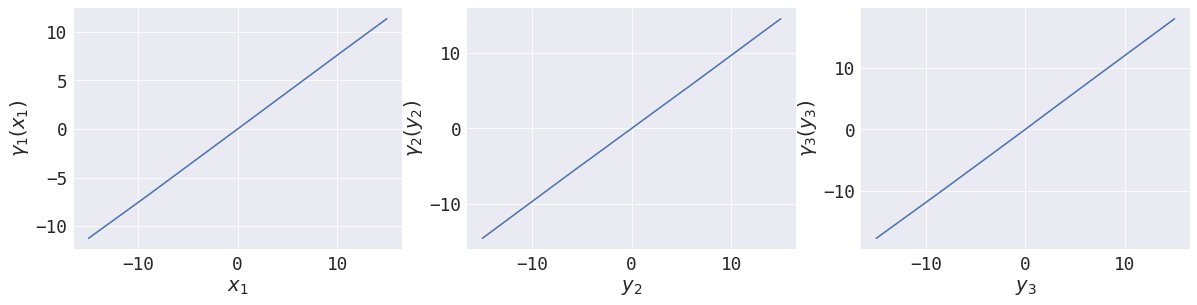

iterations 660  current loss: 6.02166 



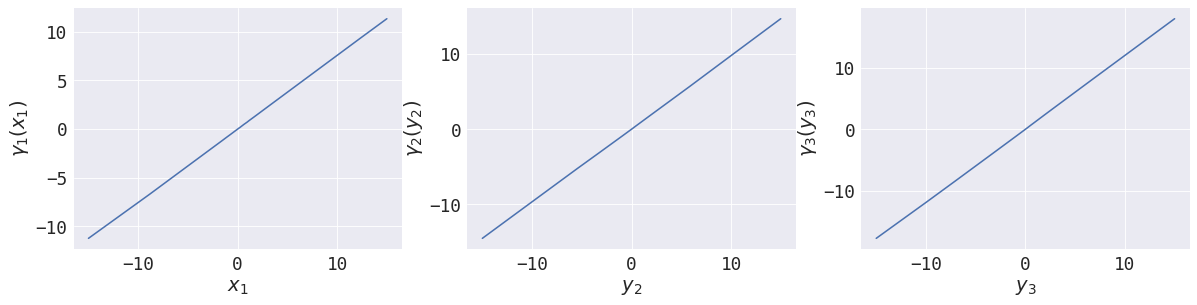

iterations 670  current loss: 6.04552 



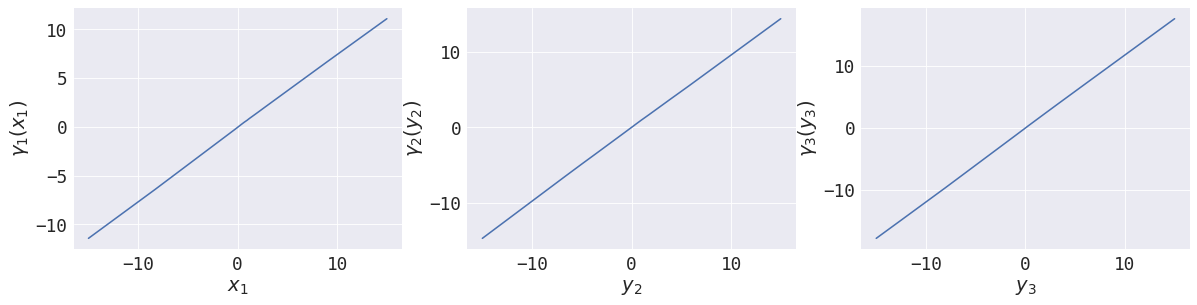

iterations 680  current loss: 6.01115 



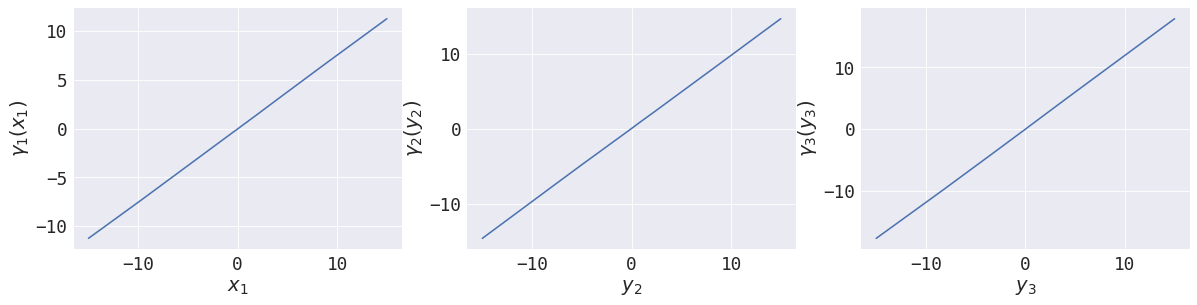

iterations 690  current loss: 6.01519 



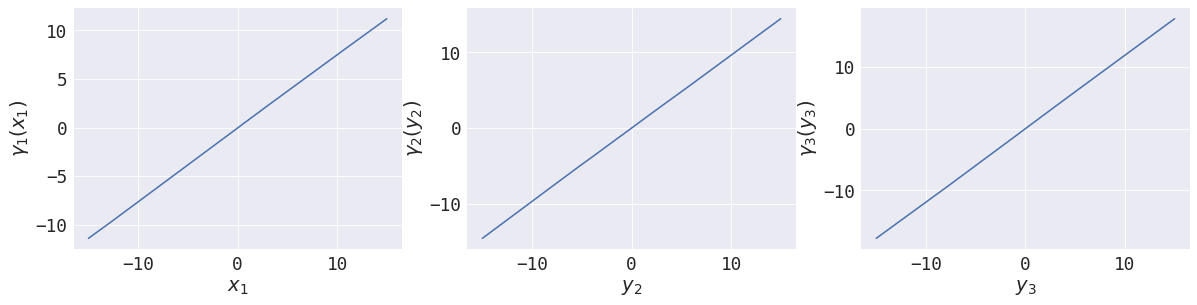

iterations 700  current loss: 6.02796 



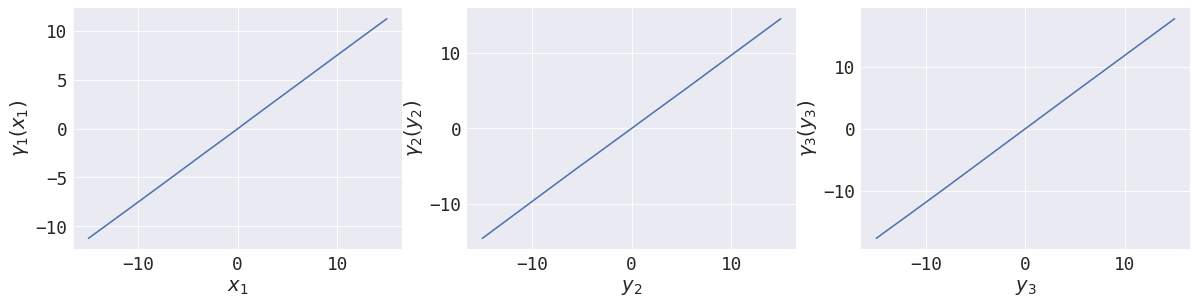

iterations 710  current loss: 6.01165 



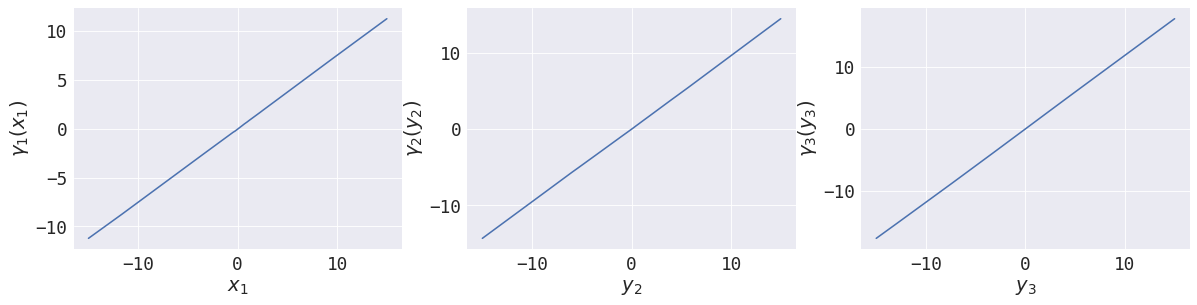

iterations 720  current loss: 6.04614 



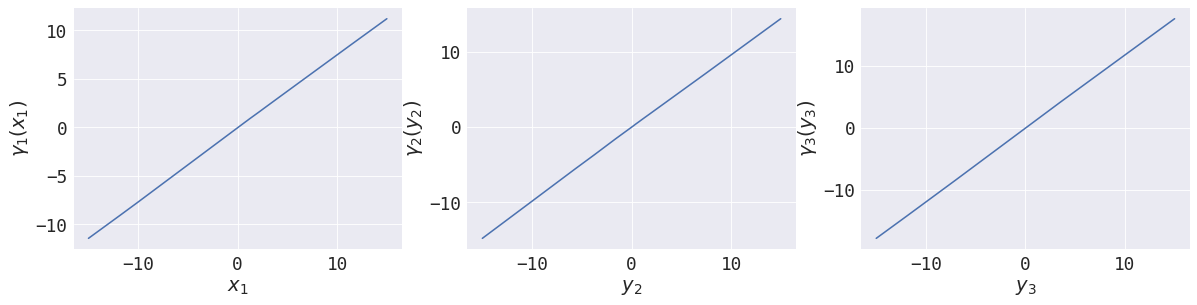

iterations 730  current loss: 6.05496 



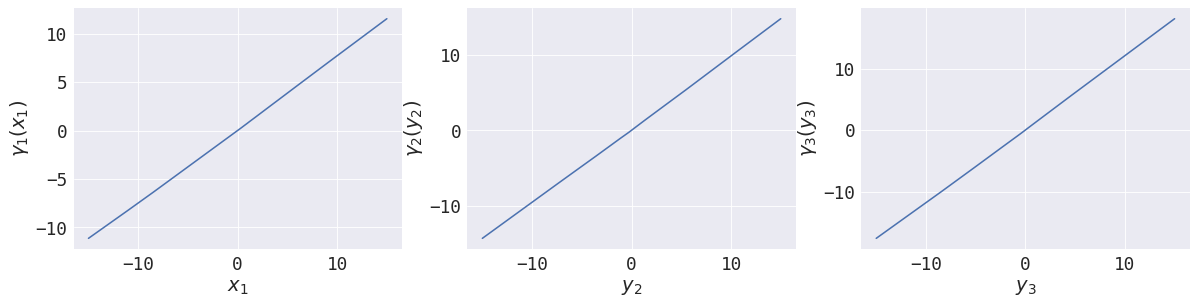

iterations 740  current loss: 6.03369 



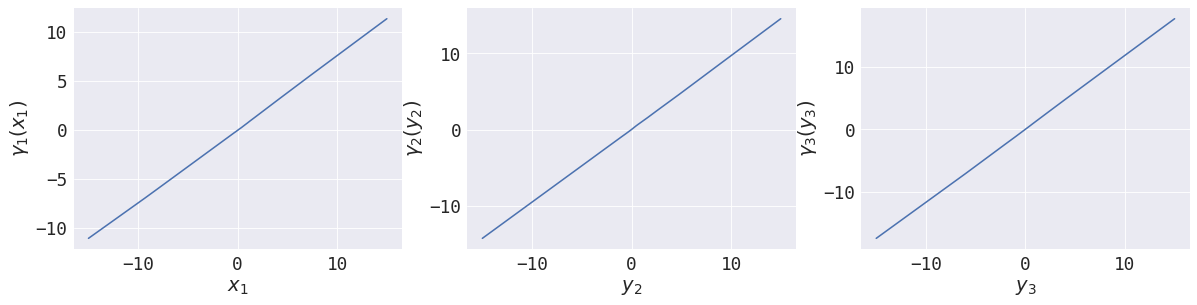

iterations 750  current loss: 6.011 



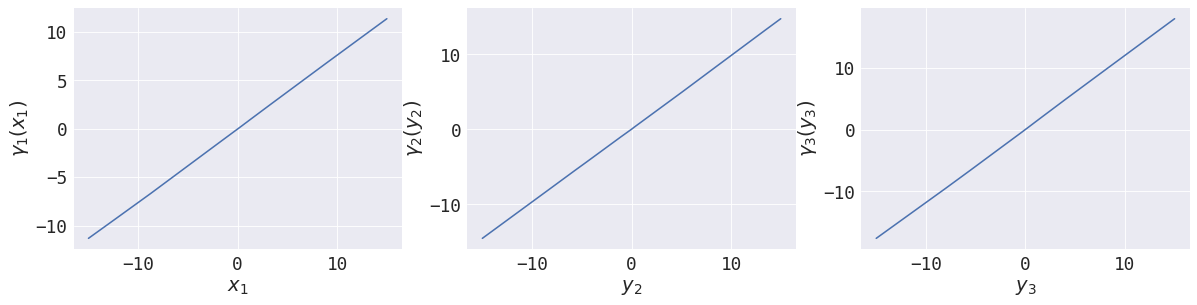

iterations 760  current loss: 6.03799 



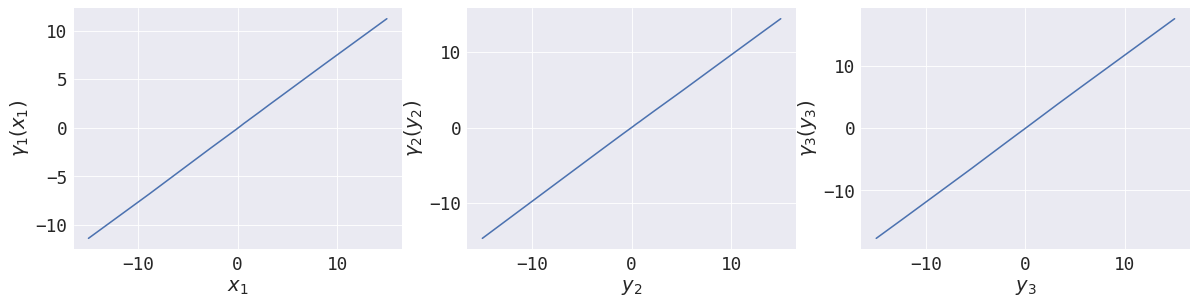

iterations 770  current loss: 6.00693 



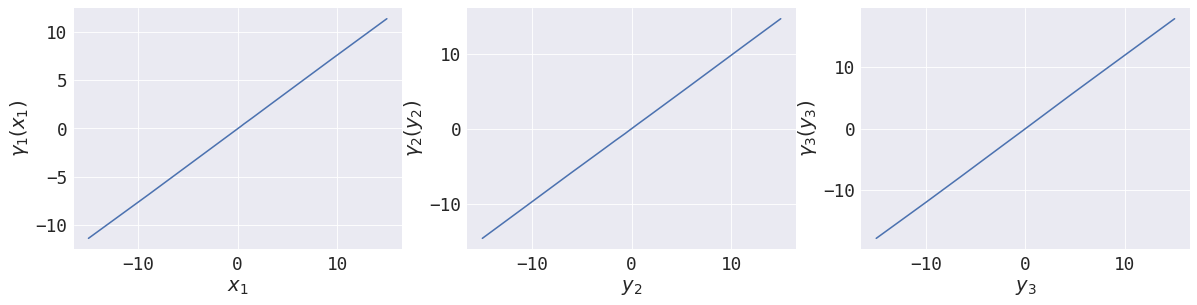

iterations 780  current loss: 6.02976 



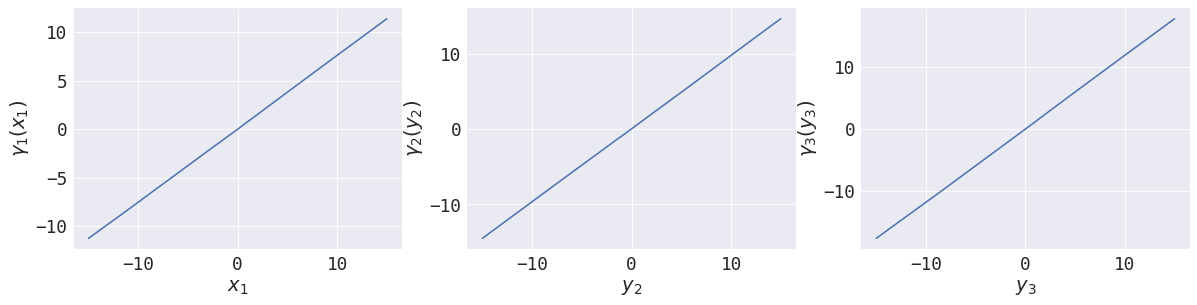

iterations 790  current loss: 6.00769 



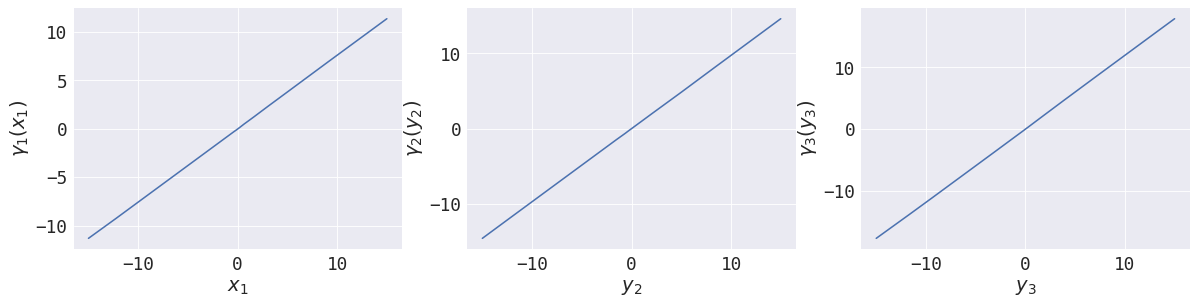

iterations 800  current loss: 6.05653 



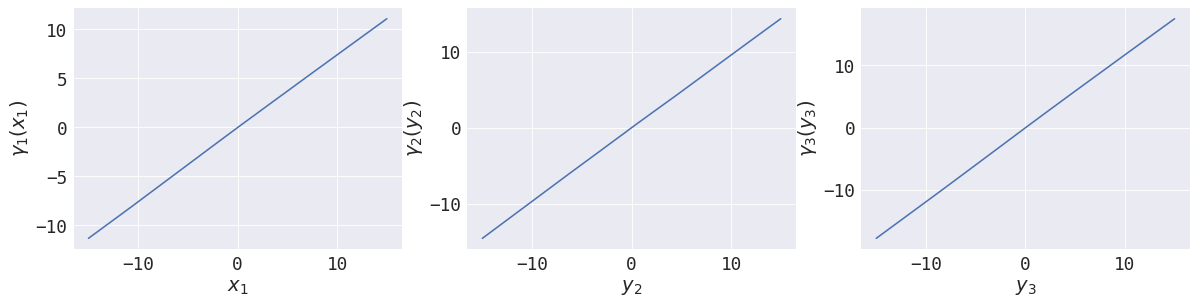

iterations 810  current loss: 6.01186 



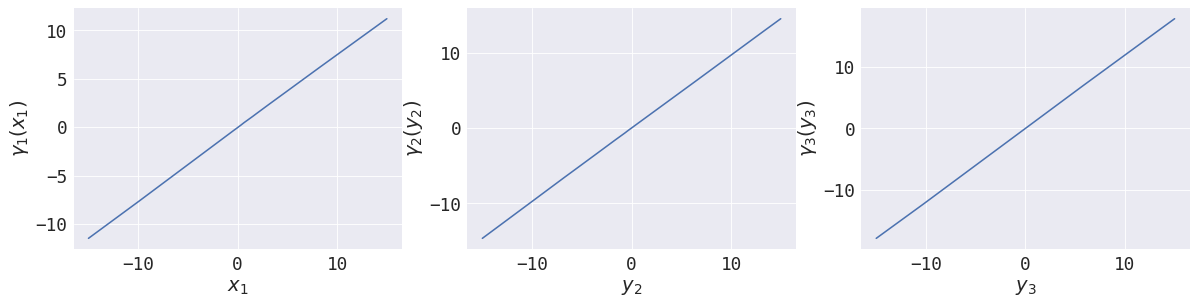

iterations 820  current loss: 6.03887 



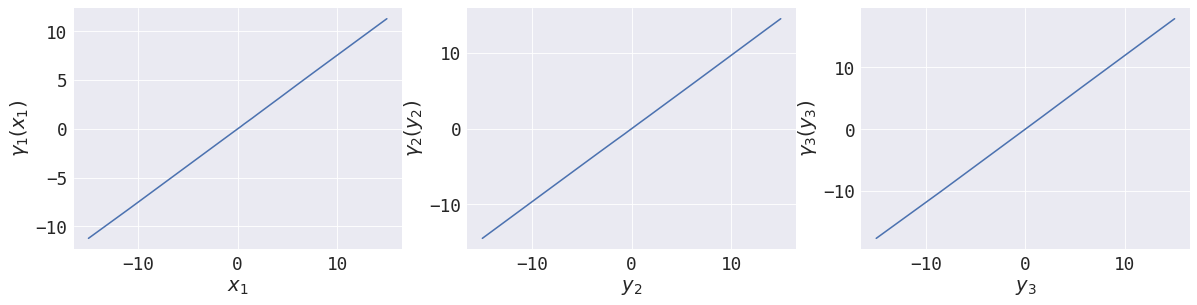

iterations 830  current loss: 6.00847 



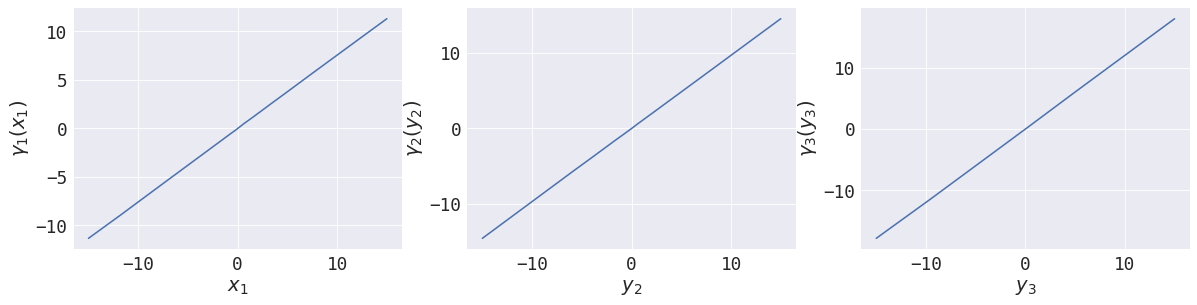

iterations 840  current loss: 6.01297 



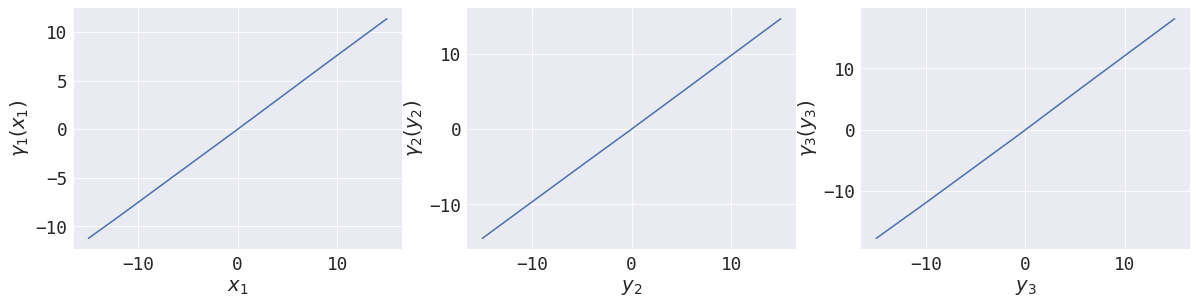

iterations 850  current loss: 6.03421 



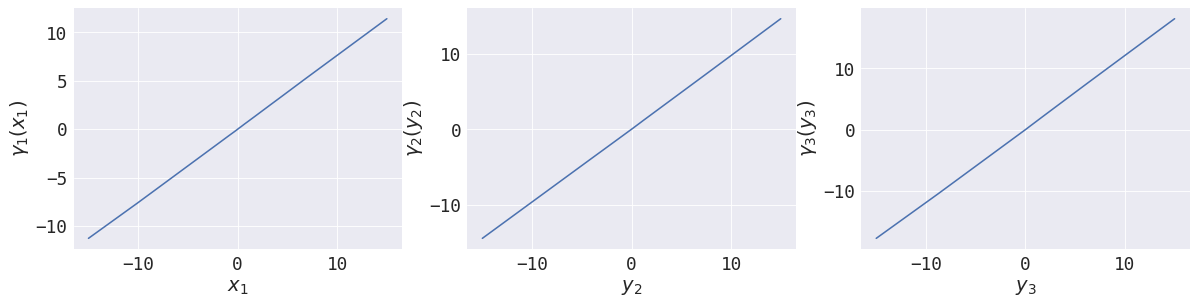

iterations 860  current loss: 5.98189 



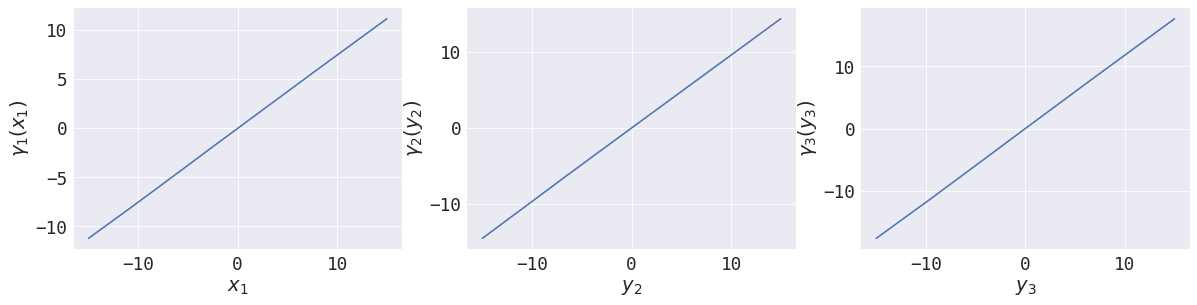

iterations 870  current loss: 6.03231 



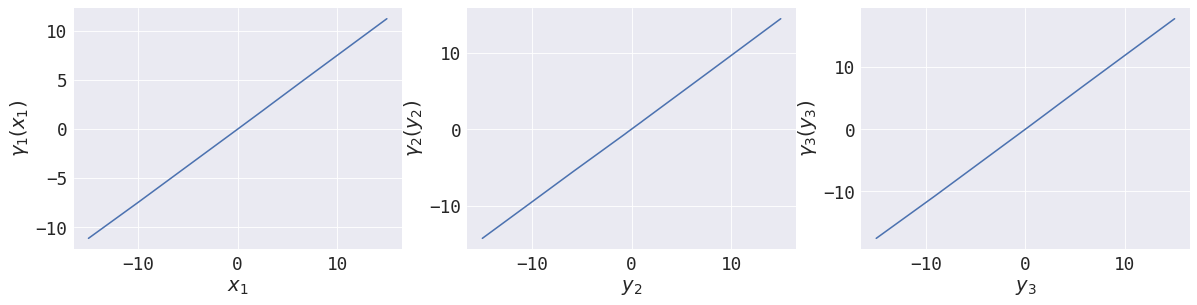

iterations 880  current loss: 6.04181 



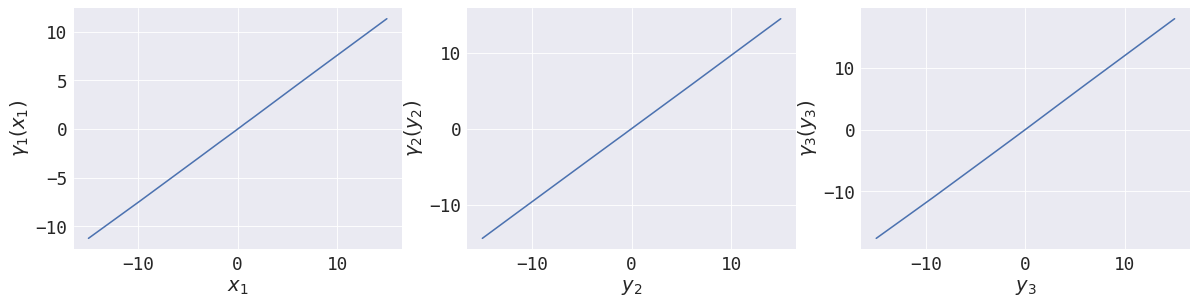

iterations 890  current loss: 6.03083 



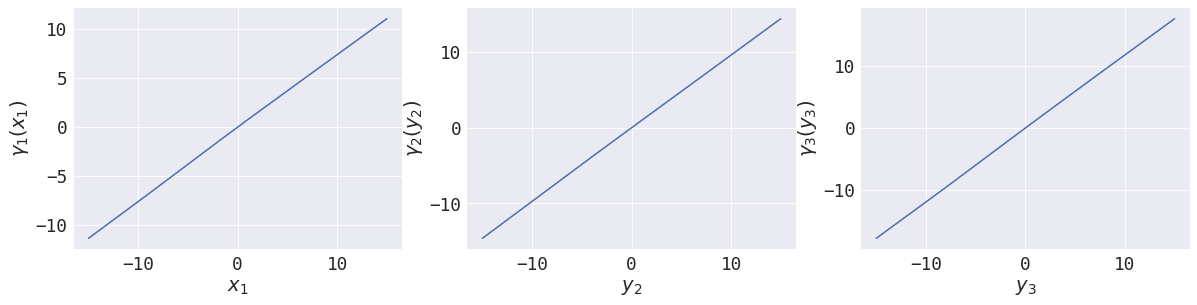

iterations 900  current loss: 6.03181 



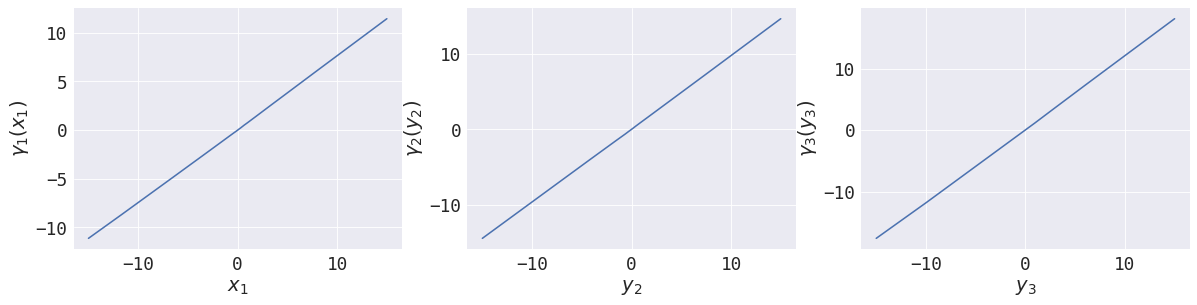

iterations 910  current loss: 5.99538 



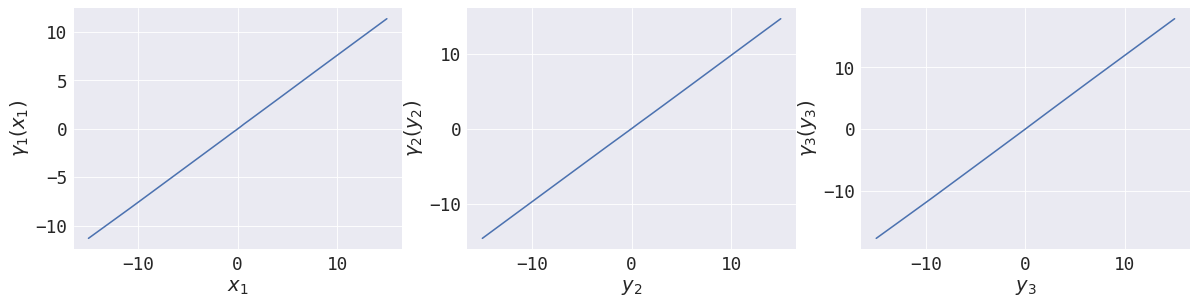

iterations 920  current loss: 6.05591 



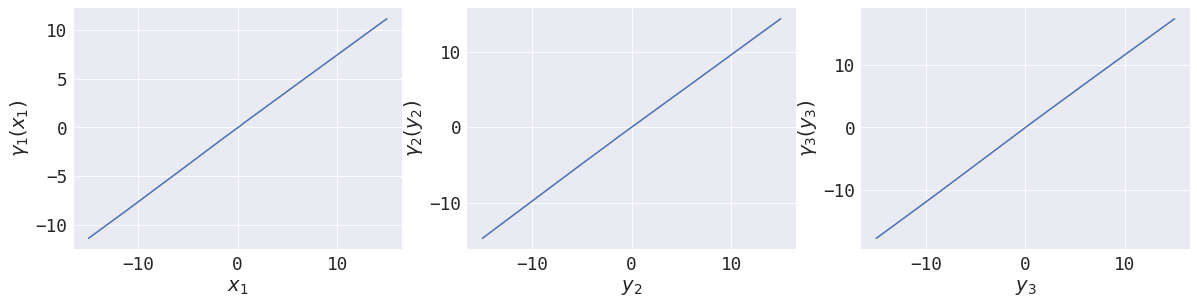

iterations 930  current loss: 6.02132 



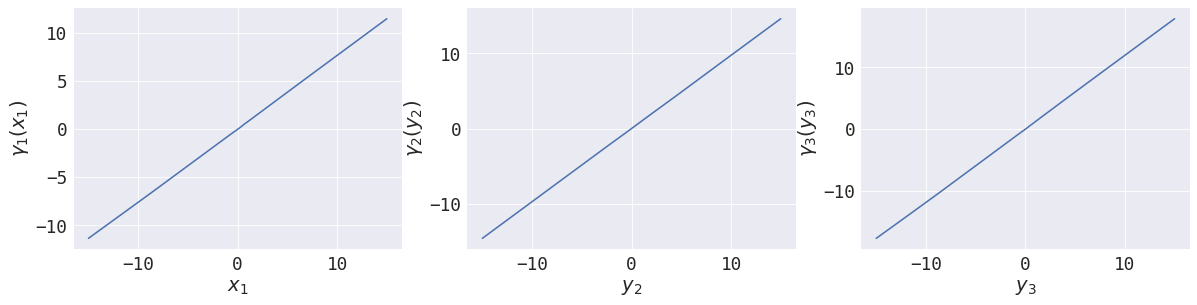

iterations 940  current loss: 6.04246 



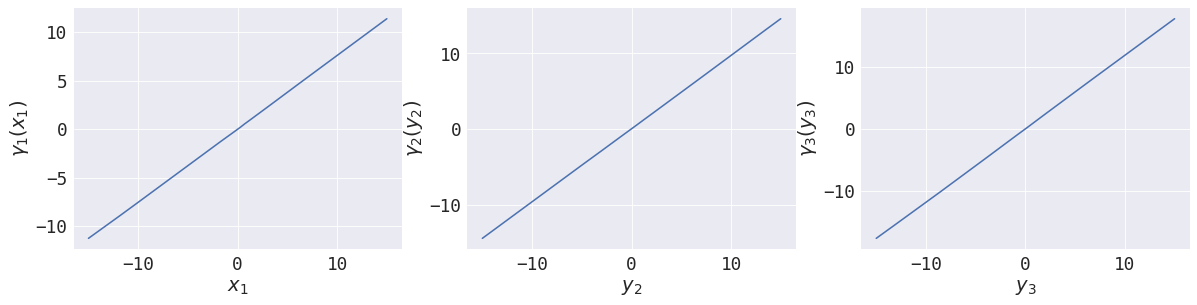

iterations 950  current loss: 6.05165 



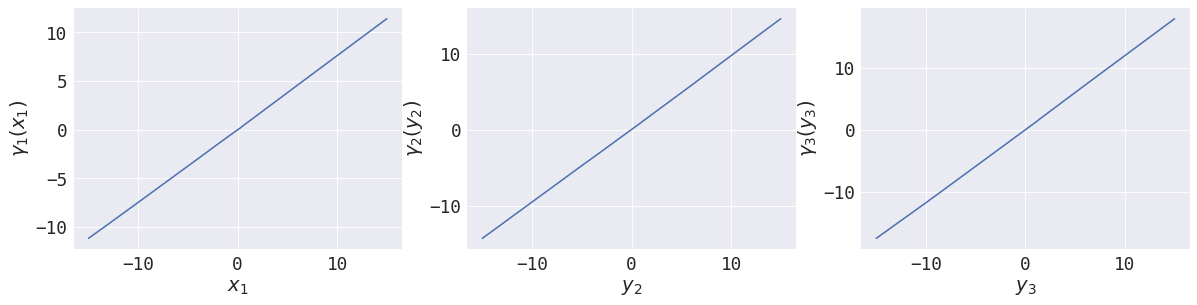

iterations 960  current loss: 6.01937 



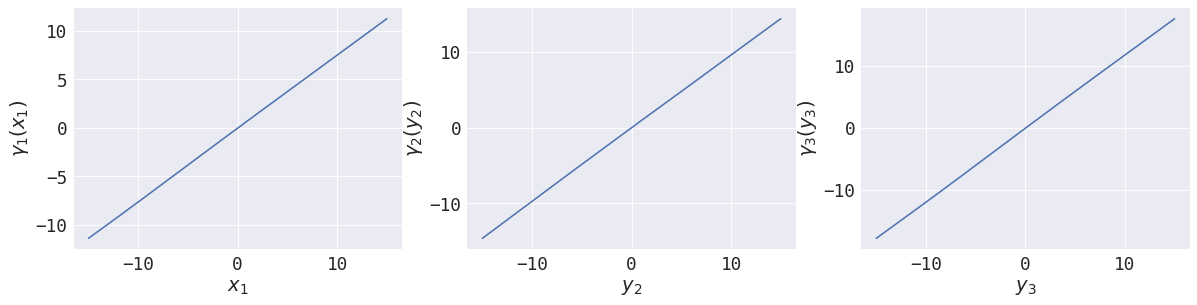

iterations 970  current loss: 6.00946 



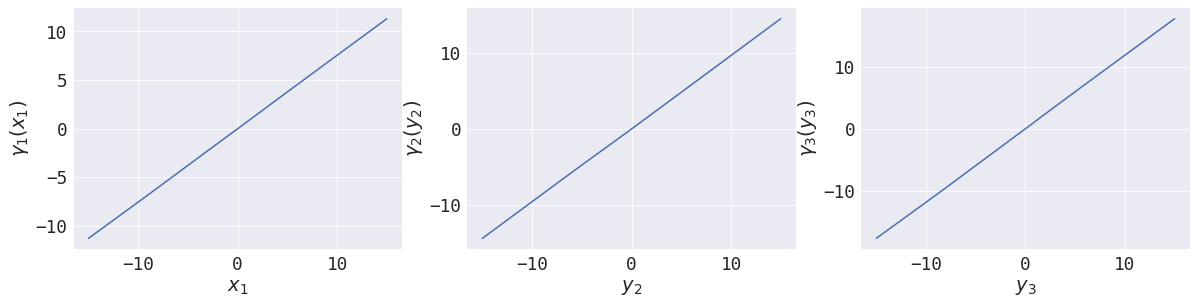

iterations 980  current loss: 6.03637 



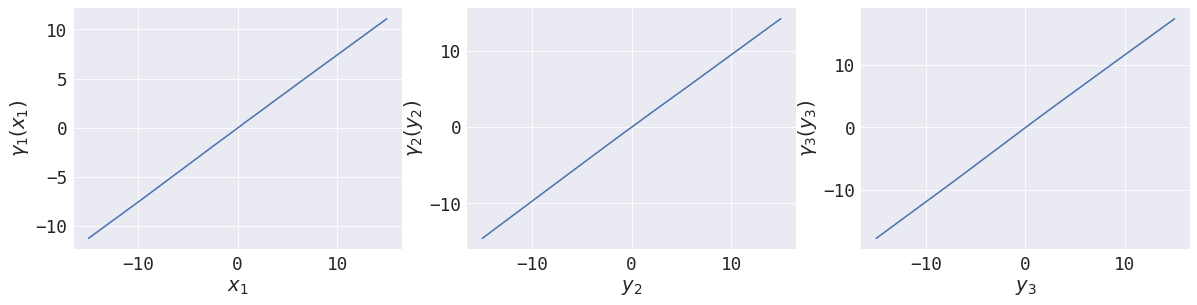

iterations 990  current loss: 6.02681 



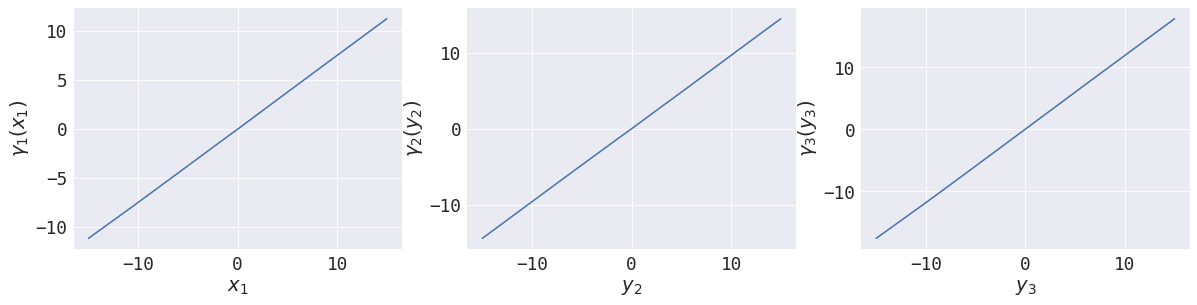

iterations 1000  current loss: 6.02374 



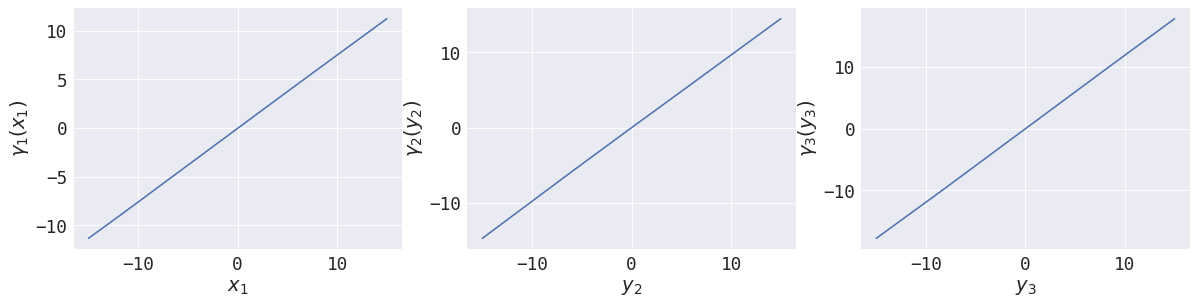

iterations 1010  current loss: 6.01462 



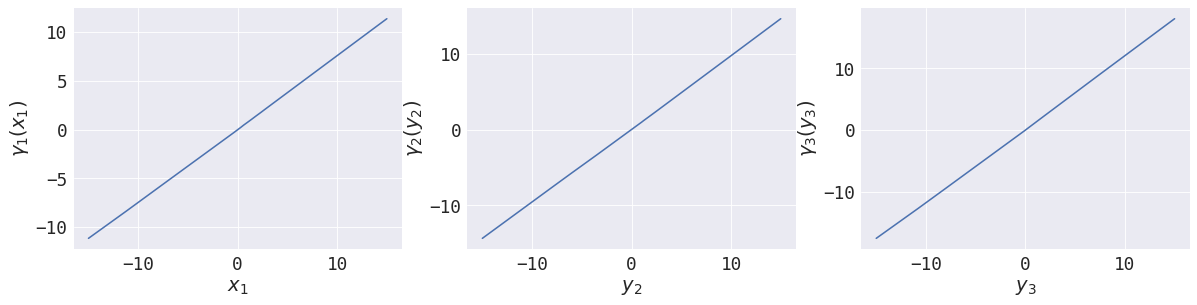

iterations 1020  current loss: 6.03547 



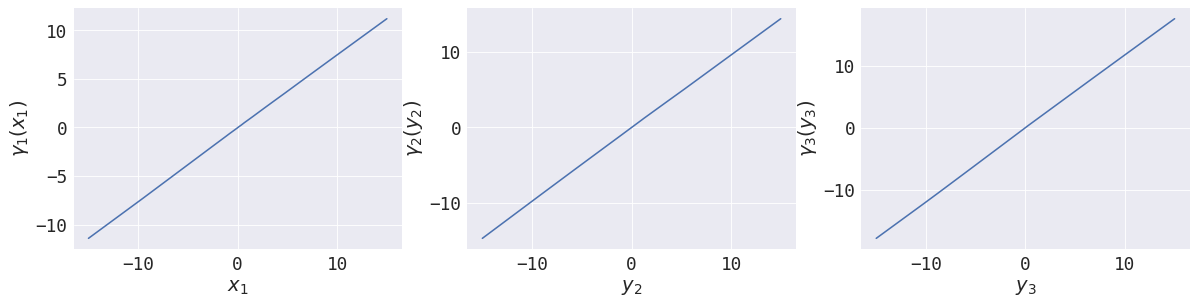

iterations 1030  current loss: 6.04858 



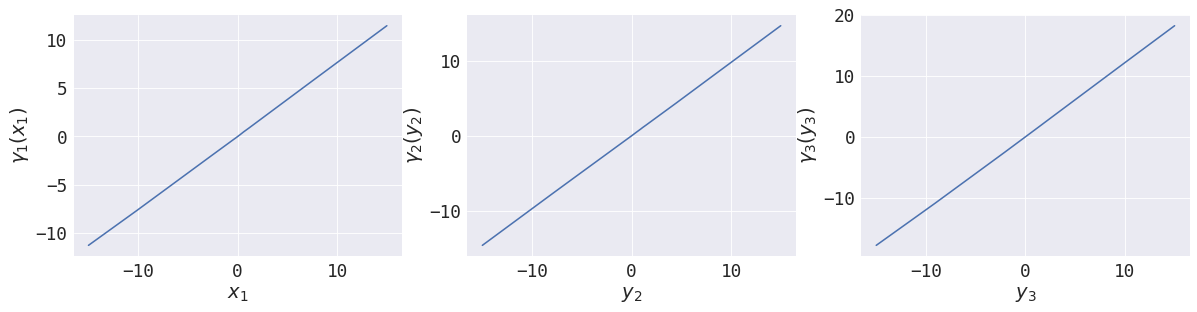

iterations 1040  current loss: 6.0217 



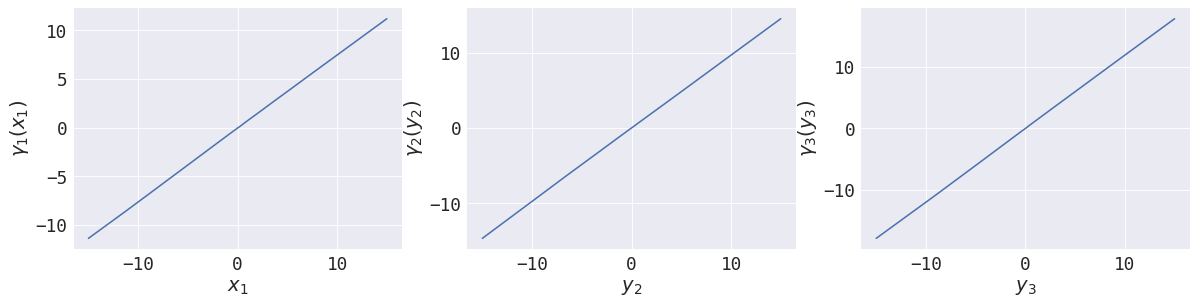

iterations 1050  current loss: 6.05029 



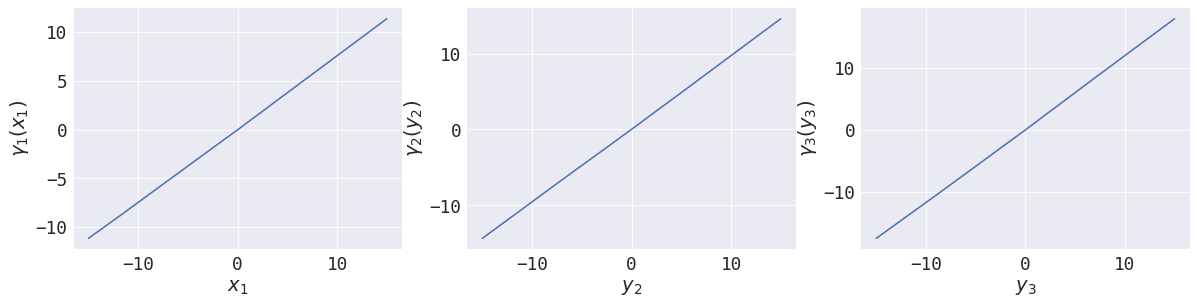

iterations 1060  current loss: 6.08862 



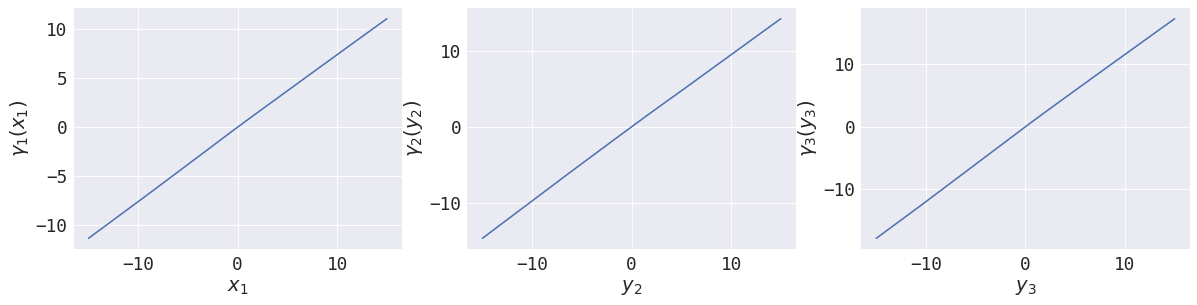

iterations 1070  current loss: 6.02719 



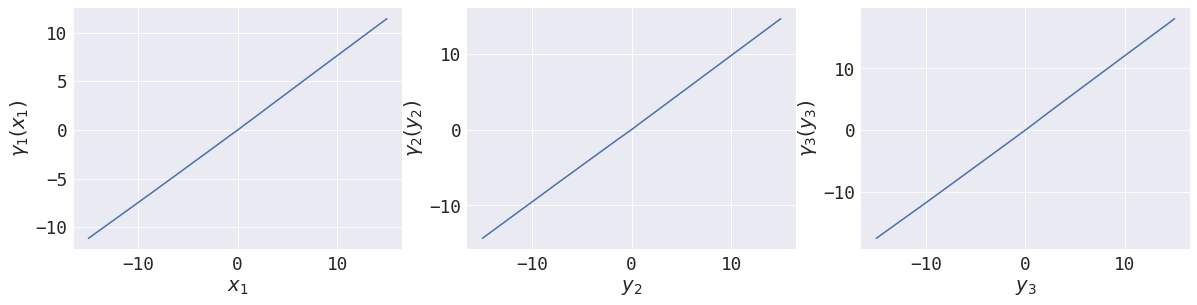

iterations 1080  current loss: 5.9985 



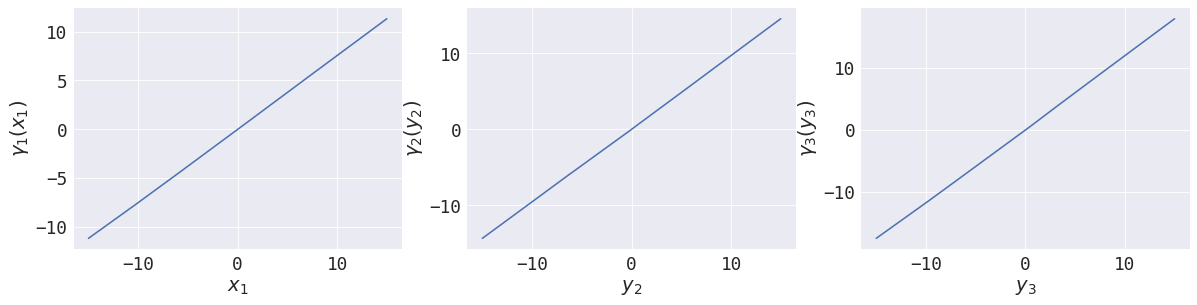

iterations 1090  current loss: 6.01163 



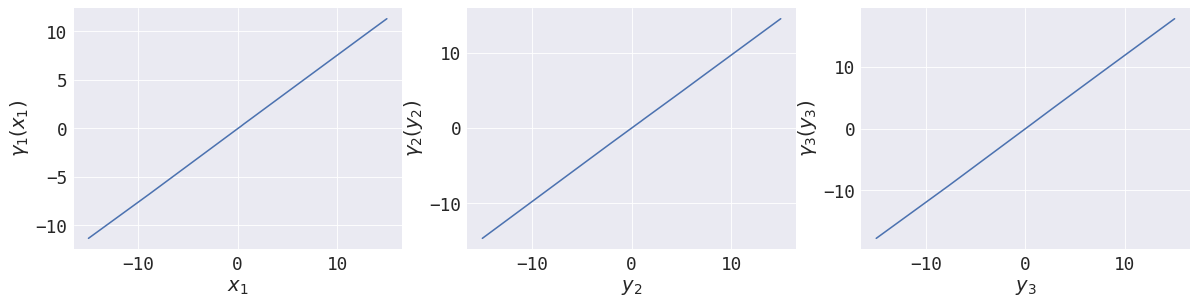

iterations 1100  current loss: 5.99673 



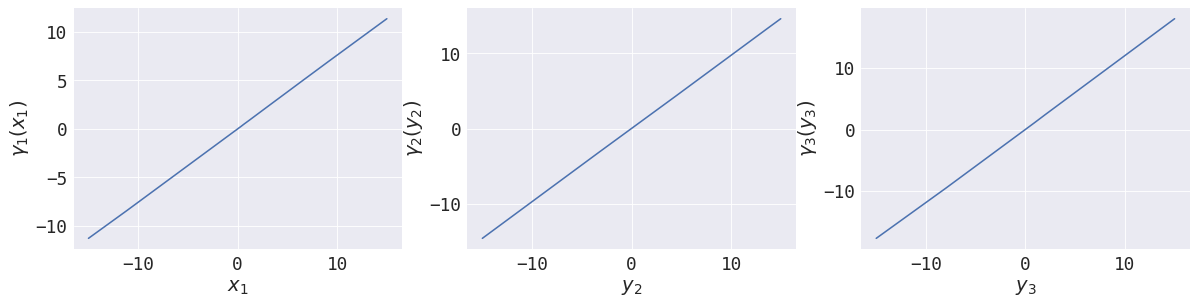

iterations 1110  current loss: 6.00299 



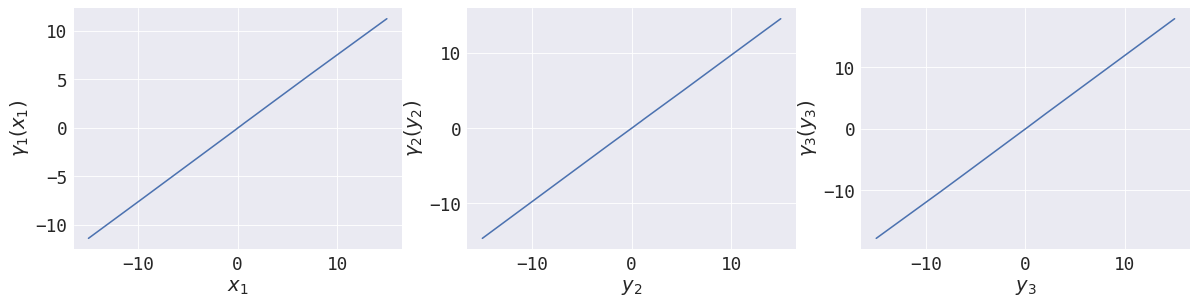

iterations 1120  current loss: 6.03349 



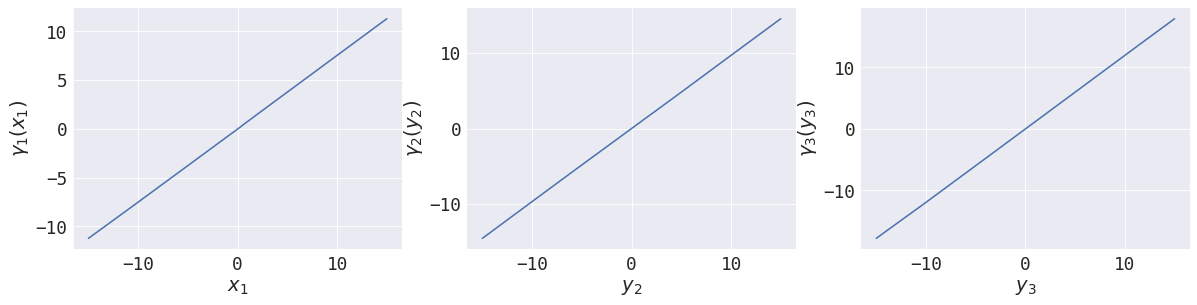

iterations 1130  current loss: 6.01995 



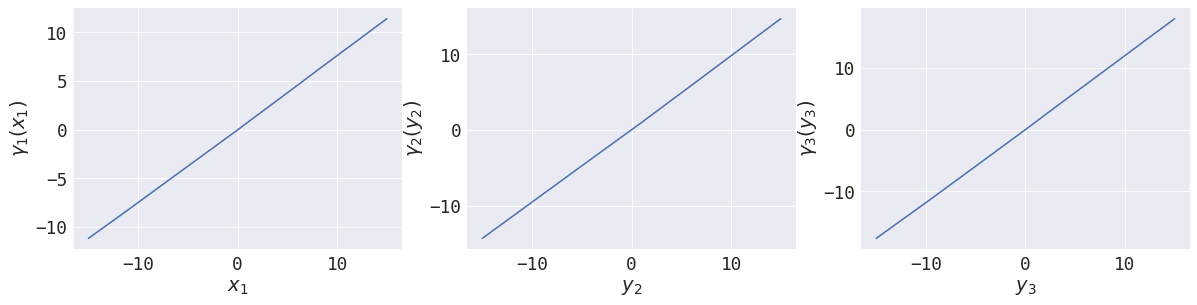

iterations 1140  current loss: 6.05507 



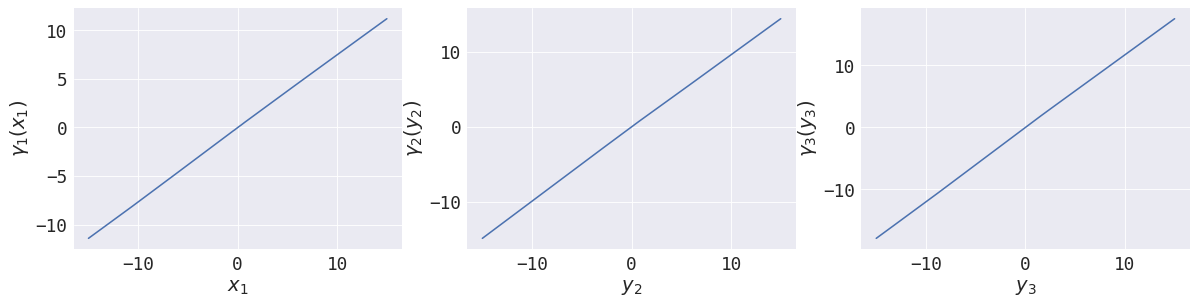

iterations 1150  current loss: 6.01808 



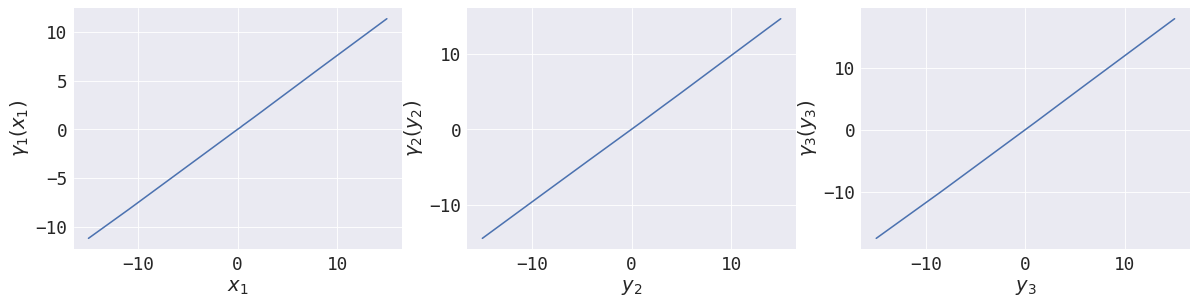

iterations 1160  current loss: 6.01553 



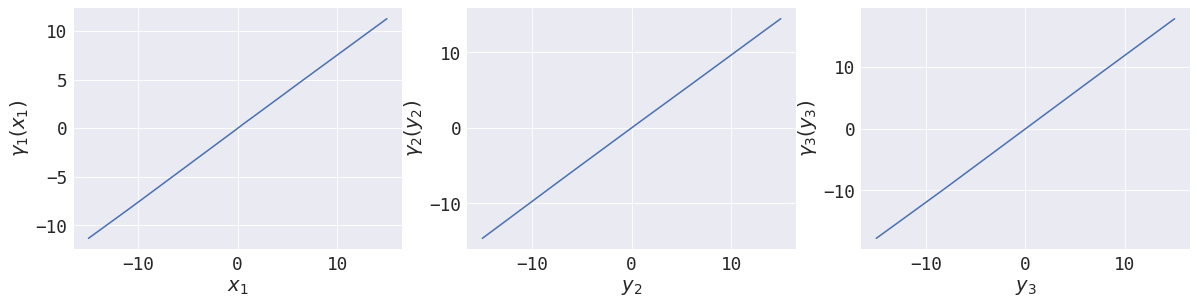

iterations 1170  current loss: 6.03942 



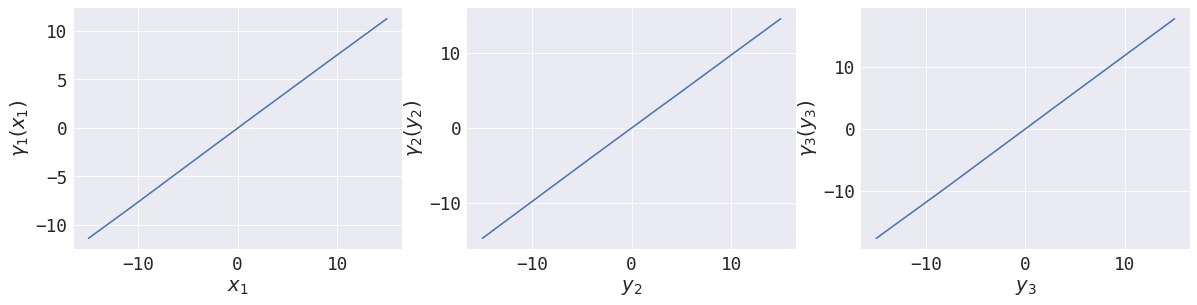

iterations 1180  current loss: 6.01696 



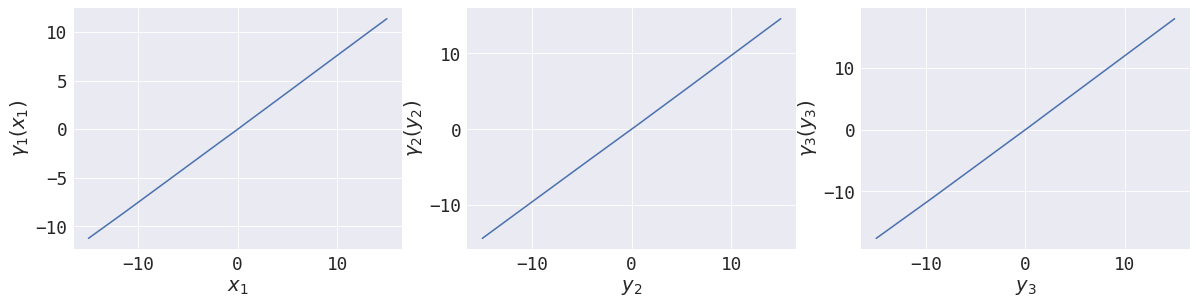

iterations 1190  current loss: 6.02644 



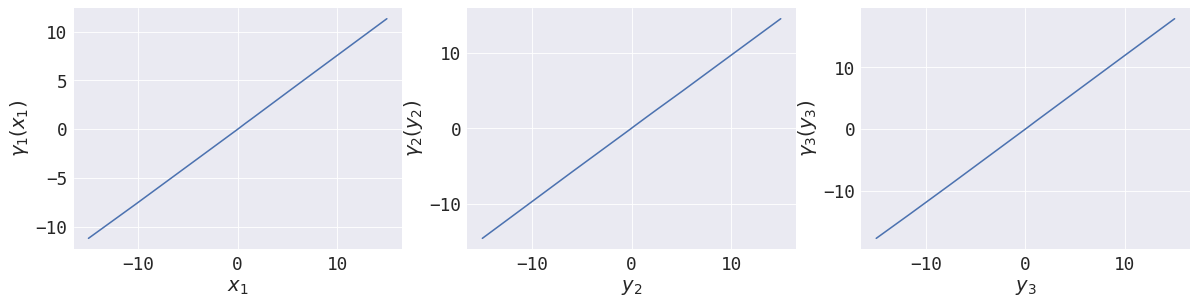

iterations 1200  current loss: 6.08516 



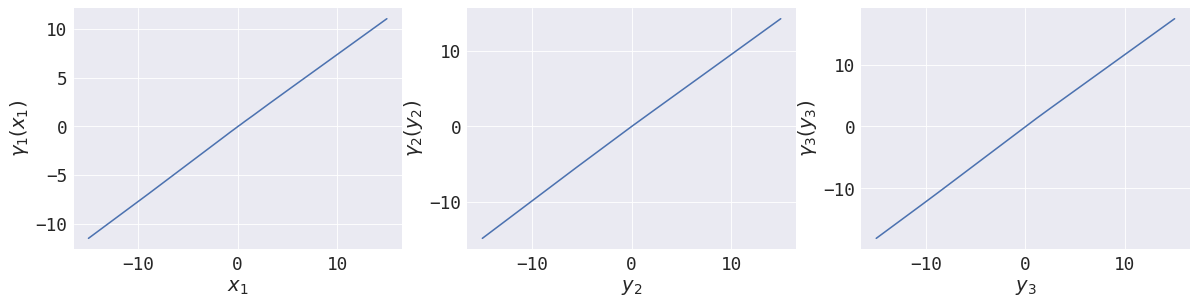

iterations 1210  current loss: 6.1651 



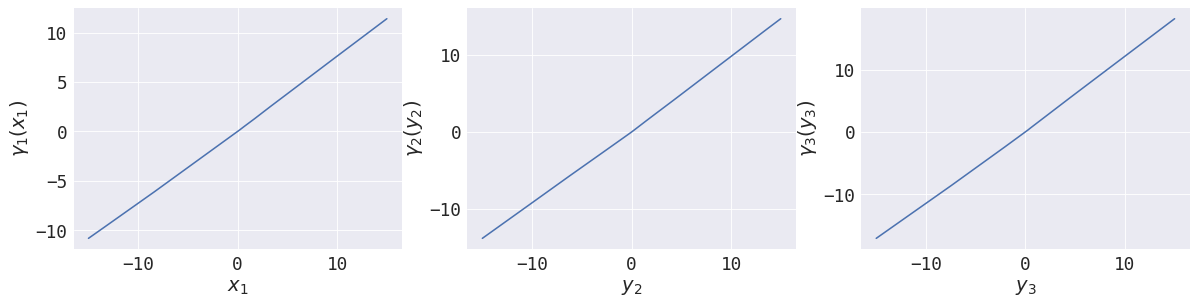

iterations 1220  current loss: 6.07695 



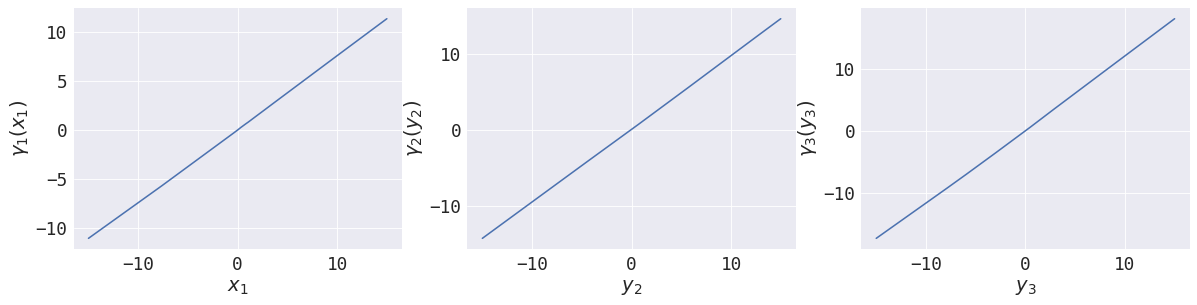

iterations 1230  current loss: 6.01649 



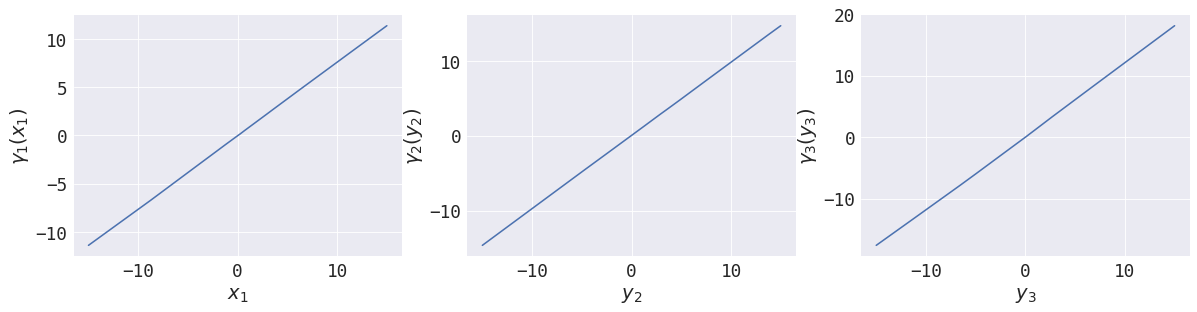

iterations 1240  current loss: 6.01788 



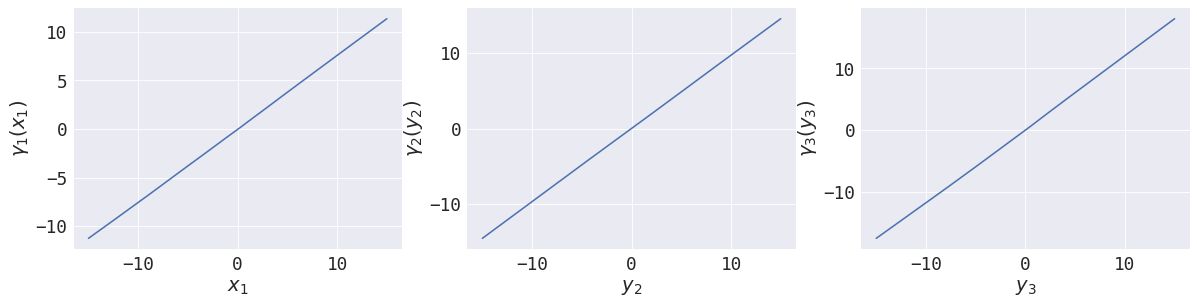

iterations 1250  current loss: 6.02317 



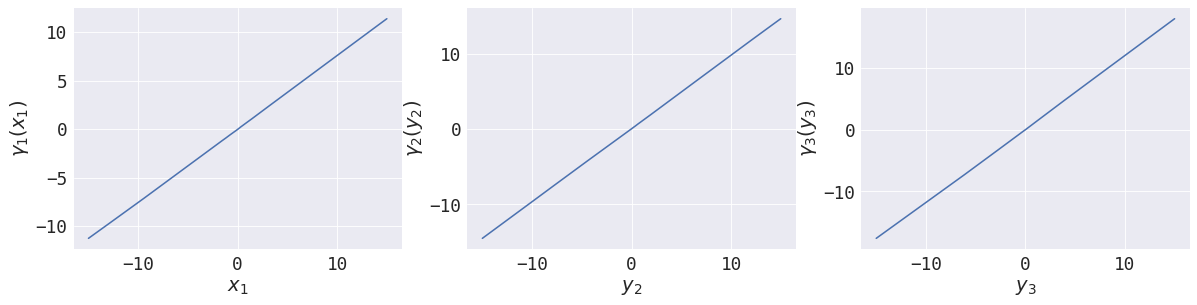

iterations 1260  current loss: 6.00679 



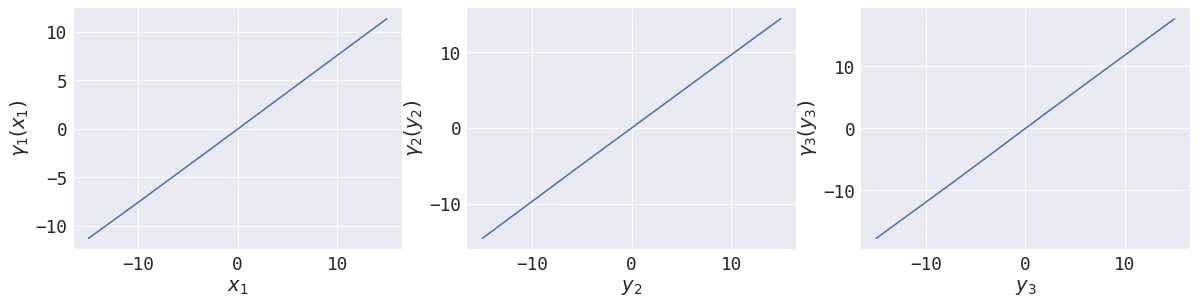

iterations 1270  current loss: 5.99777 



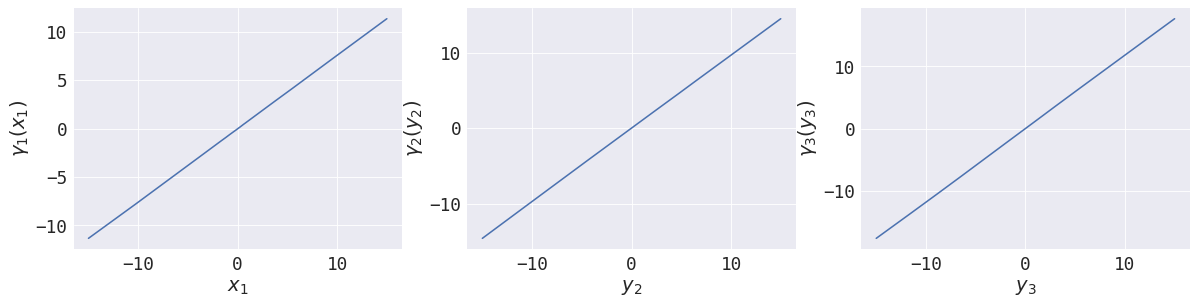

iterations 1280  current loss: 6.00962 



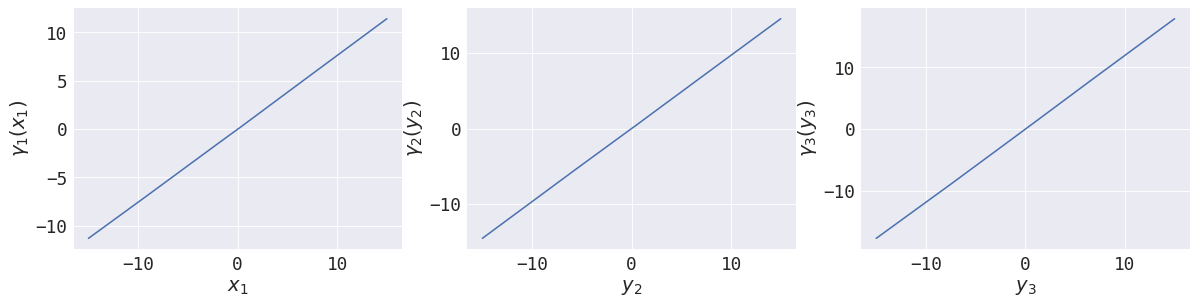

iterations 1290  current loss: 6.04837 



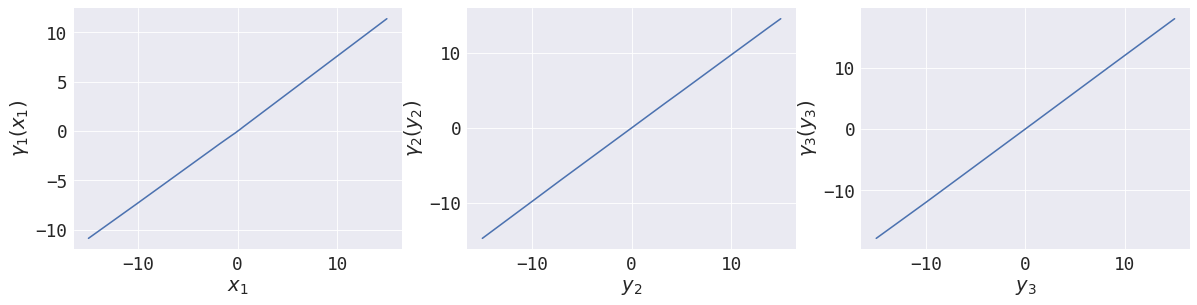

iterations 1300  current loss: 6.05649 



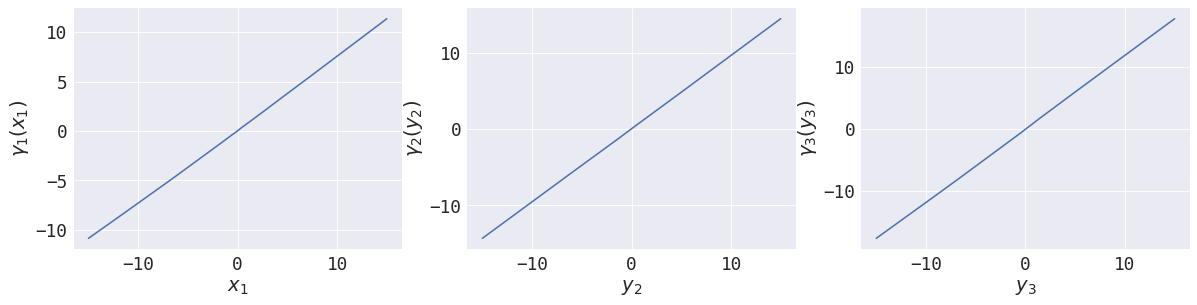

iterations 1310  current loss: 6.80822 



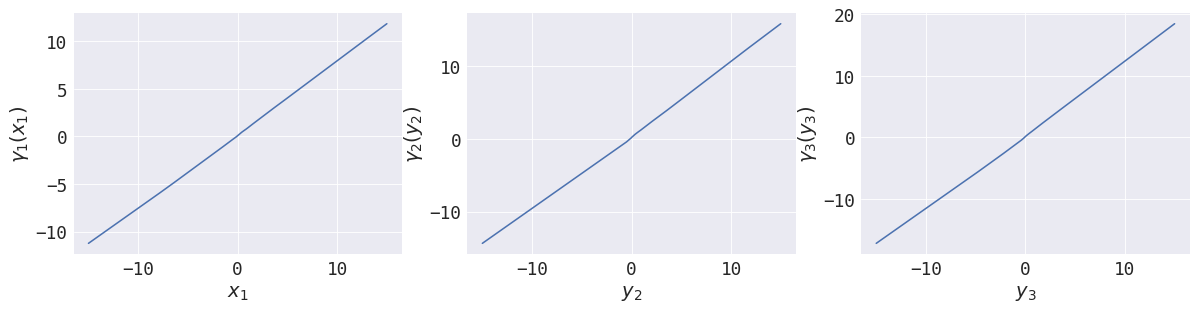

iterations 1320  current loss: 16.1839 



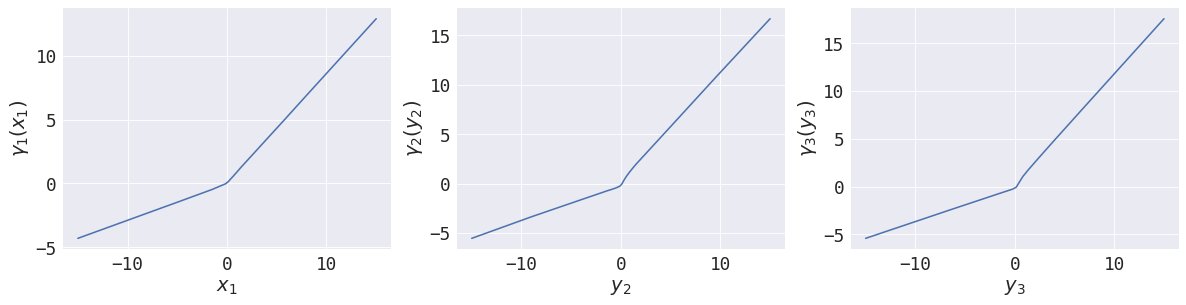

iterations 1330  current loss: 21.365 



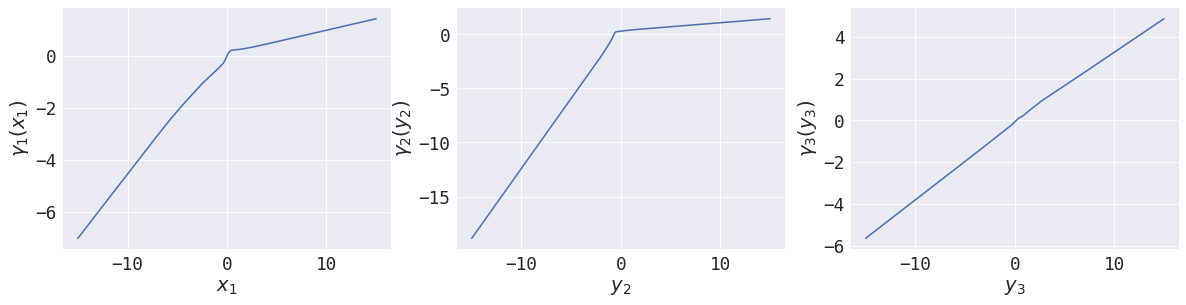

iterations 1340  current loss: 18.3715 



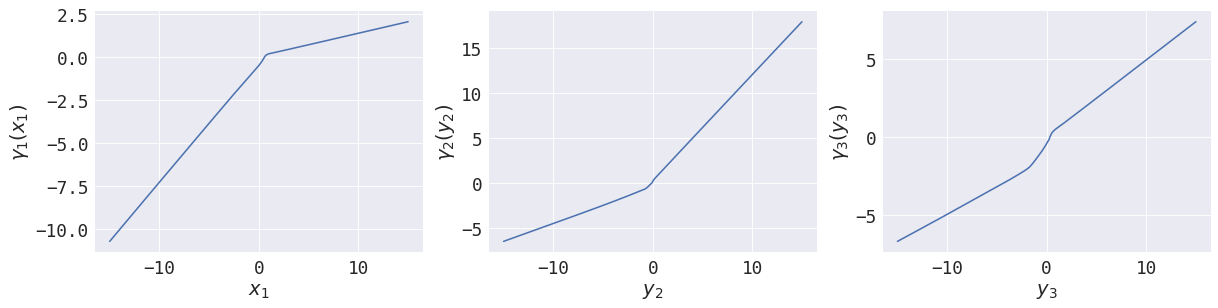

iterations 1350  current loss: 24.3791 



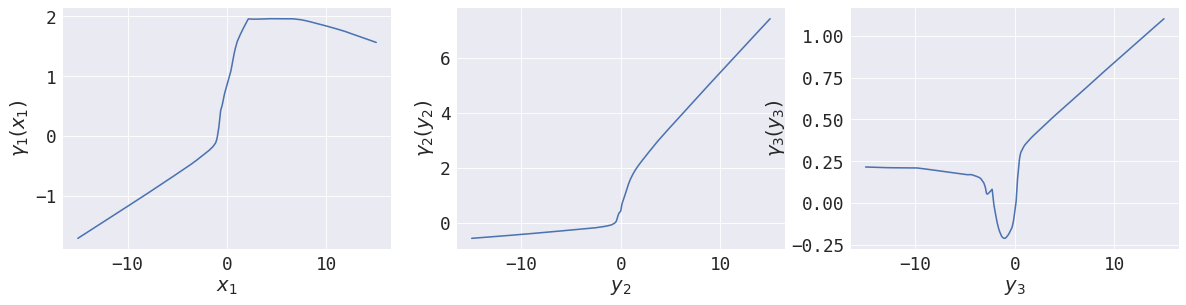

iterations 1360  current loss: 23.5452 



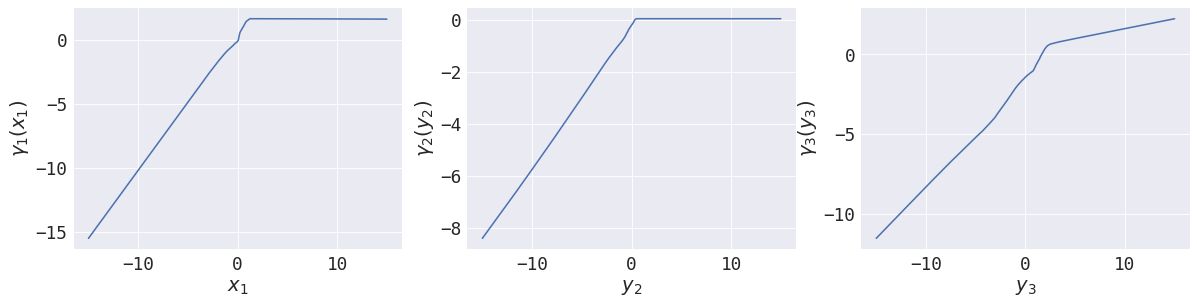

iterations 1370  current loss: 25.0962 



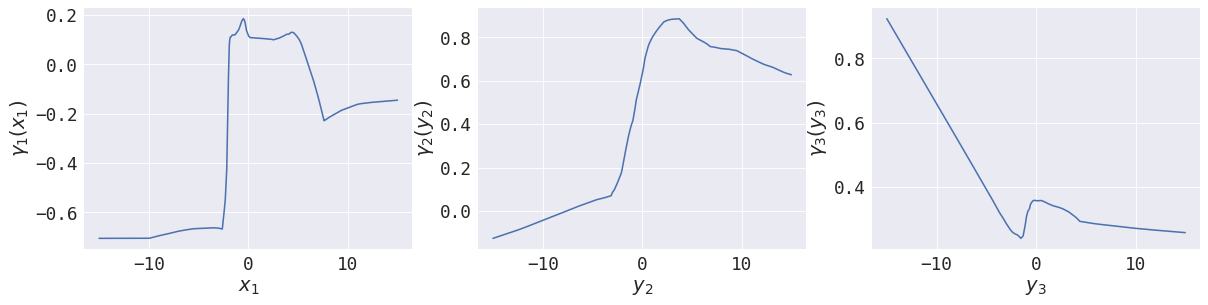

iterations 1380  current loss: 24.9575 



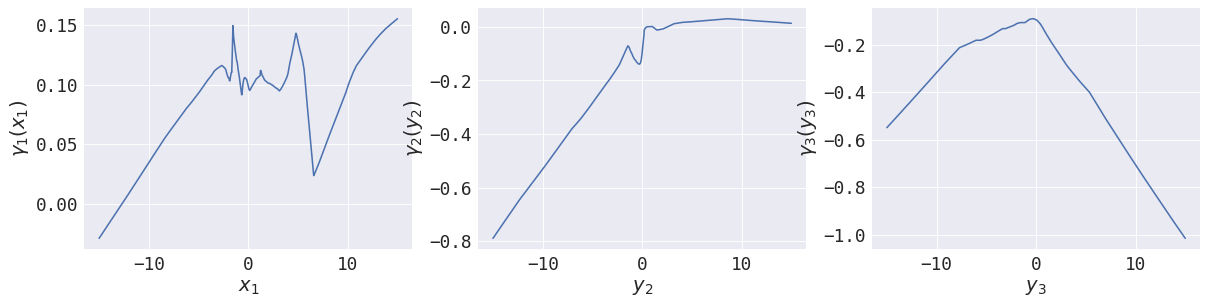

iterations 1390  current loss: 24.9381 



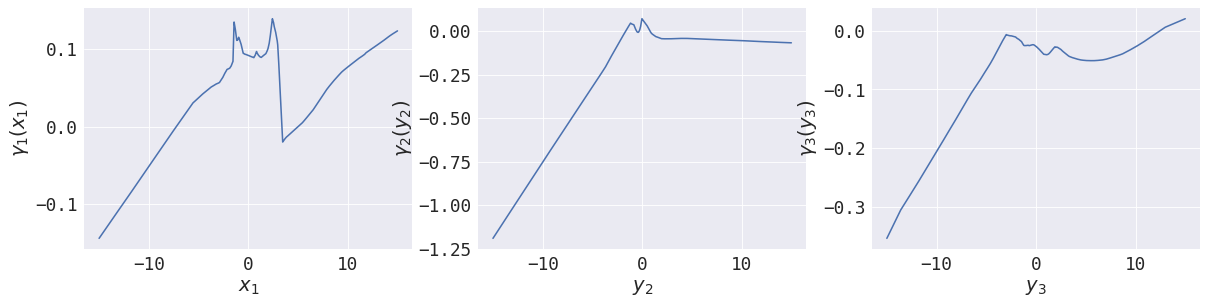

iterations 1400  current loss: 24.937 



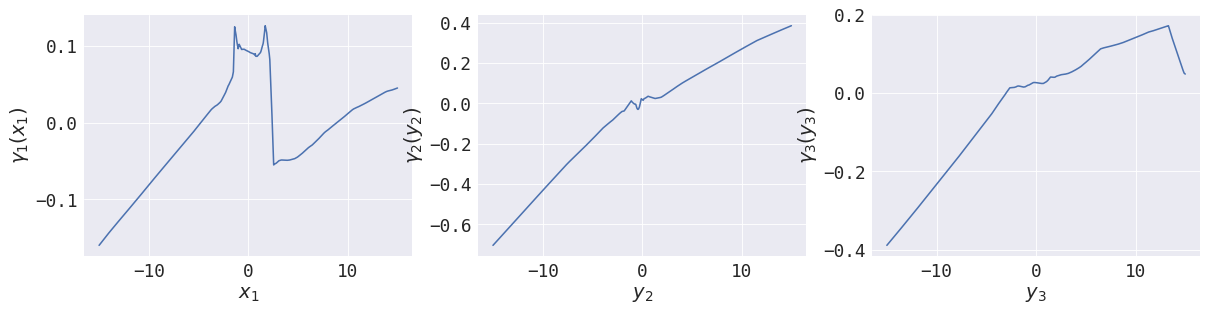

iterations 1410  current loss: 24.9367 



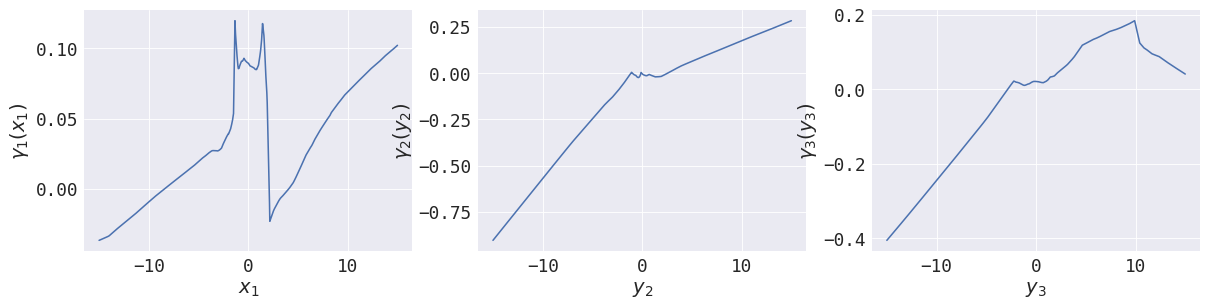

iterations 1420  current loss: 24.9363 



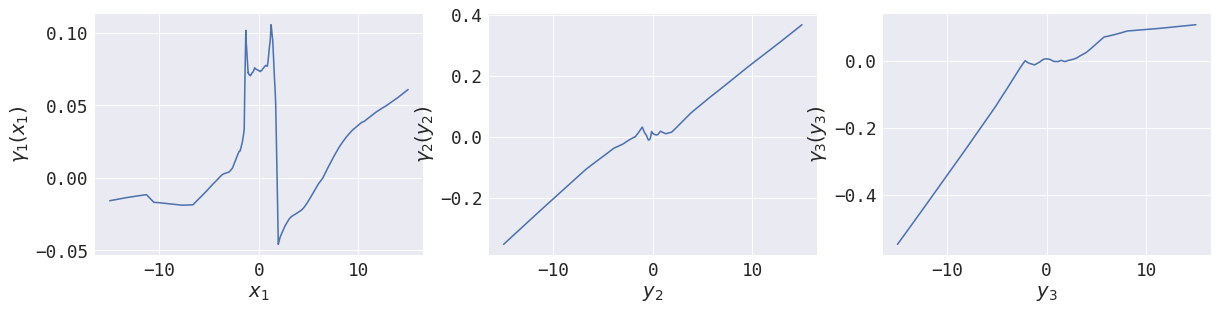

iterations 1430  current loss: 24.9361 



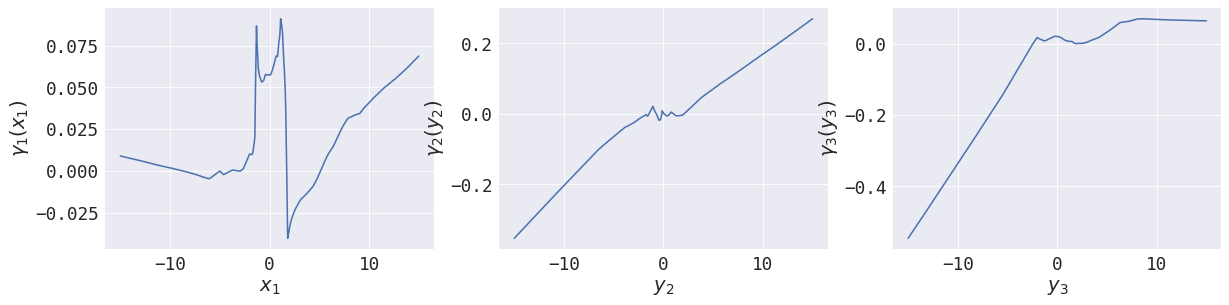

iterations 1440  current loss: 24.9361 



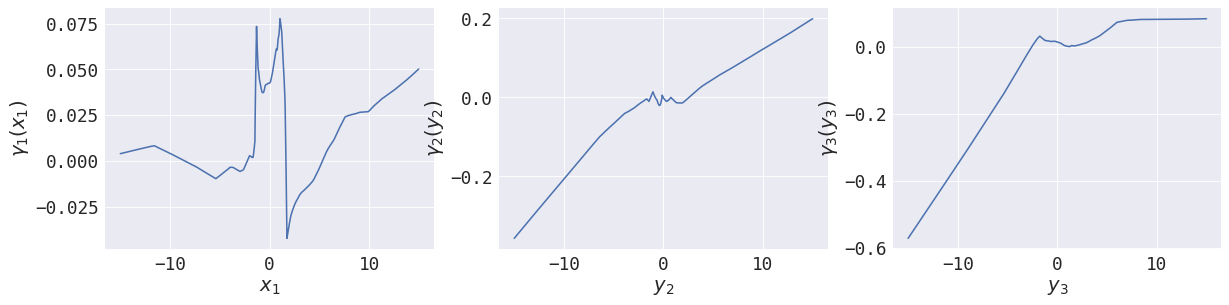

iterations 1450  current loss: 24.9358 



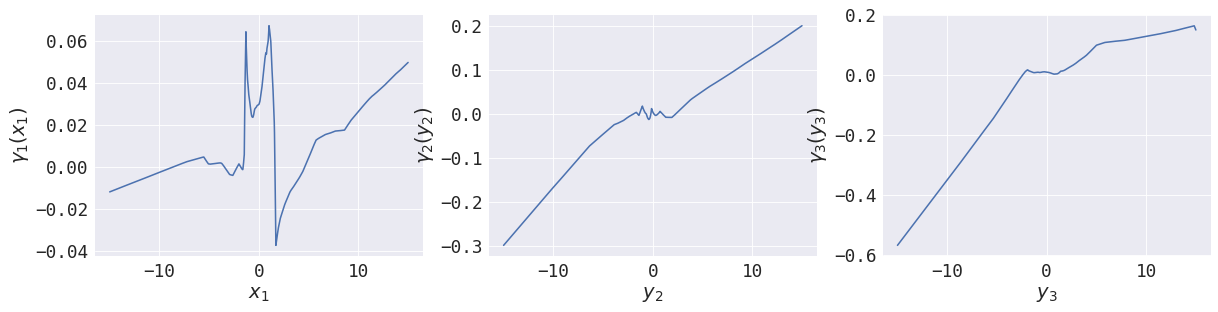

iterations 1460  current loss: 24.9363 



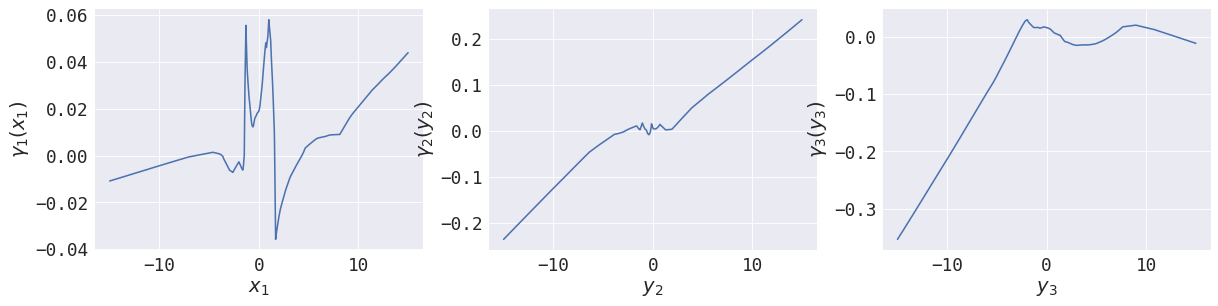

iterations 1470  current loss: 24.9363 



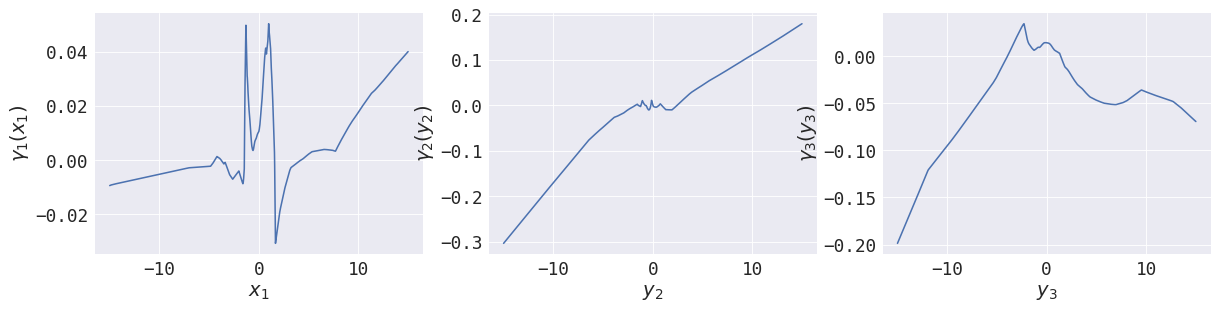

iterations 1480  current loss: 24.9361 



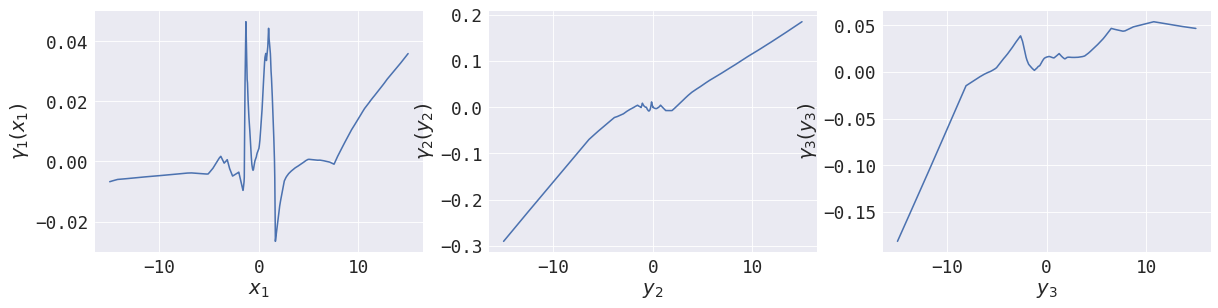

iterations 1490  current loss: 24.9367 



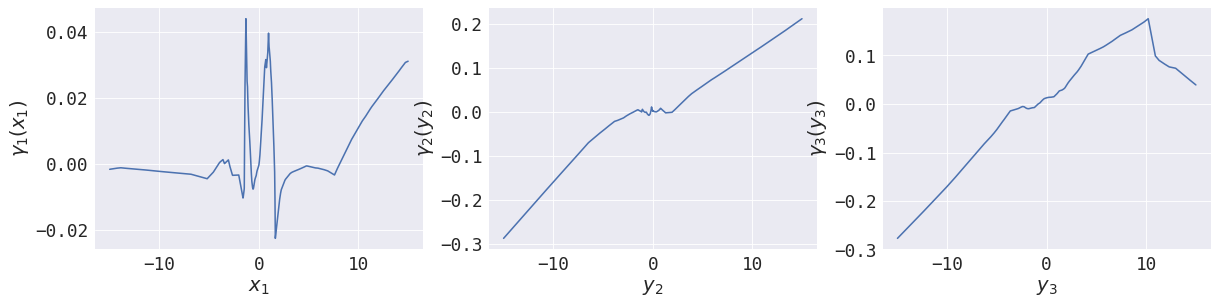

In [ ]:
input_data = 5*np.random.randn(input_signal_num, 1) # generate # of gaussian dist input
feed_dict2 =  {x:input_data, tmp_c : np.array([[1]]), disp : np.array([[0]])}
for i in range(number_of_iterations): #30000 add more iteration here
    sess.run(optimizer, feed_dict2)
    if i % 10 == 0:
        print('iterations', i,' current loss:',sess.run(loss,feed_dict2),'\n')
        
        fig=plt.figure(figsize=(18, 4), dpi= 80, facecolor='w', edgecolor='k')

        y_axis = sess.run(u1, feed_dict = {x:x_axis, tmp_c : np.array([[0]]), disp: x_axis})
        plt.subplot(1,3,1)
        plt.plot(x_axis[:,0],y_axis[:,0])
        plt.xlabel('$x_1$')
        plt.ylabel('$\gamma_1(x_1)$')
        
        plt.subplot(1,3,2)
        y_axis = sess.run(u2, feed_dict = {x:x_axis, tmp_c : np.array([[0]]), disp: x_axis})
        plt.plot(x_axis[:,0],y_axis[:,0])
        plt.xlabel('$y_2$')
        plt.ylabel('$\gamma_2(y_2)$')
        
        plt.subplot(1,3,3)
        y_axis = sess.run(u3, feed_dict = {x:x_axis, tmp_c : np.array([[0]]), disp: x_axis})
        plt.plot(x_axis[:,0],y_axis[:,0])
        plt.xlabel('$y_3$')
        plt.ylabel('$\gamma_3(y_3)$')
        plt.show()

# After optimization with loss

In [ ]:
plt.savefig('GaussianRelayChannel.png')
y_axis = sess.run(u1, feed_dict = {x:x_axis, tmp_c : np.array([[0]]), disp: x_axis})
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('x')
plt.ylabel('$\gamma_1$(x)')
plt.show()
y_axis = sess.run(u2, feed_dict = {x:x_axis, tmp_c : np.array([[0]]), disp: x_axis})
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('x')
plt.ylabel('$\gamma_2$(y)')
plt.show()
